# VGCharts: Top 10,000 Best Selling Video Games Globally
## Data Exploration in R
#### By: Whitney King

Data obtained on 5/22/2017


## Introduction

This data exploration will take an in depth look at data scraped from the
VGChartz.com charts for regional and global video games sales (by millions
of units). This data was obtained on 5/22/2017 using a Python3 script, and
importing BeautifulSoup to parse out the HTML data.

After the dataset was scraped from the table on 
[VGChartz website](http://www.vgchartz.com/gamedb/), it was then limited
to the top 10,000 rows, and formatted using a data frame before being output
to CSV for use in R. I've opted to format and color all charts, since they 
are easier for me to read that way.

The goal of this exploration will be to gain a general understanding of
which features of video games are correlated to success in different 
regions around the globe and across time. It will also look at platforms,
and how they're related to the ebb and flow of video games. 

### Motivating Questions

* Which region has the most game units shipped?
* Is the popularity of video games still on the rise?
* Which game platform has been the most successful?


### Data Overview

The dataset is structured as follows:

* **Rank** *(num)*;
  Primary Key/Unique Identifier for each game in the list,
  ranked best-selling to worst-selling
* **Name** *(factor)*;
  Title of the video game
* **Platform** *(factor)*;
  Console/Platform game was released on
* **Year** *(num)*;
  Year game was released
* **Genre** *(factor)*;
  Genre/Category of the game title
* **Publisher** *(factor)*;
  Publisher of the video game
* **NA_Sales** *(num)*;
  Sales in millions of units in North America
* **EU_Sales** *(num)*;
  Sales in millions of units in Europe
* **JP_Sales** *(num)*;
  Sales in millions of units in Europe
* **Other_Sales** *(num)*;
  Sales in millions of units in other regions of the globe
* **Global_Sales** *(num)*;
  Total sales in units globally
  
Columns being generated are:

* **Decade** *(factor)*;
  Decade the game was released
* **Franchise** *(factor)*;
  Name of the franchise the game is from
* **Company_Name** *(factor)*;
  Company that built the game console the game was published on

  
### Limitations

Since this data was collected from VGChartz, it is not an authoritative list of all games ever released. Certain factors may prevent a game from landing on the VGChartz charts, however most highly publicized titles are in the dataset. This exploration is concerned with the top 10k bestselling games of all time, this list is pretty comprehensive and a good source to investigate. 

Additionally, the counts are taken as sales figures (Global_Sales, NA_Sales, etc.), however this is a bit of a misnomer, since some games come free with other purchases, or are given away but still count towards a unit. Due to this factor, the numbers will mostly be talked about as units shipped instead of units sold, though it can be assumed most titles sold copies instead of gave them away.


In [10]:
oldw <- getOption("warn")
options(warn = -1)


# install packages
install.packages('dplyr', repos = "http://cran.us.r-project.org")
install.packages('ggplot2', repos = "http://cran.us.r-project.org")
install.packages('corrplot', repos = "http://cran.us.r-project.org")
install.packages('ggcorrplot', repos = "http://cran.us.r-project.org")
install.packages('PerformanceAnalytics', repos = "http://cran.us.r-project.org")
install.packages('GGally', repos = "http://cran.us.r-project.org")
install.packages('ggthemes', dependencies = TRUE, repos = "http://cran.us.r-project.org")
install.packages('Hmisc', repos = "http://cran.us.r-project.org")
install.packages('plotly', repos = "http://cran.us.r-project.org")
install.packages('gridExtra', repos = "http://cran.us.r-project.org")
install.packages('reshape2', repos = "http://cran.us.r-project.org")
install.packages('alr3', repos = "http://cran.us.r-project.org")
install.packages('tidyr', repos = "http://cran.us.r-project.org")
install.packages('psych', repos = "http://cran.us.r-project.org")

library(ggplot2)
library(psych)
library(corrplot)
library(ggcorrplot)
library(GGally)
library(PerformanceAnalytics)
library(ggthemes)
library(Hmisc)
library(plotly)
library(dplyr)
library(gridExtra)
library(data.table)
library(reshape2)
library(alr3)
library(tidyr)
#library(scales)

theme_set(theme_minimal(10))


options(warn = oldw)

Installing package into 'C:/Users/dooki/Documents/R/win-library/3.3'
(as 'lib' is unspecified)
Installing package into 'C:/Users/dooki/Documents/R/win-library/3.3'
(as 'lib' is unspecified)
Installing package into 'C:/Users/dooki/Documents/R/win-library/3.3'
(as 'lib' is unspecified)
Installing package into 'C:/Users/dooki/Documents/R/win-library/3.3'
(as 'lib' is unspecified)
Installing package into 'C:/Users/dooki/Documents/R/win-library/3.3'
(as 'lib' is unspecified)
Installing package into 'C:/Users/dooki/Documents/R/win-library/3.3'
(as 'lib' is unspecified)



  There is a binary version available but the source version is later:
       binary source needs_compilation
GGally  1.3.1  1.3.2             FALSE



installing the source package 'GGally'

Installing package into 'C:/Users/dooki/Documents/R/win-library/3.3'
(as 'lib' is unspecified)
Installing package into 'C:/Users/dooki/Documents/R/win-library/3.3'
(as 'lib' is unspecified)
Installing package into 'C:/Users/dooki/Documents/R/win-library/3.3'
(as 'lib' is unspecified)
Installing package into 'C:/Users/dooki/Documents/R/win-library/3.3'
(as 'lib' is unspecified)
Installing package into 'C:/Users/dooki/Documents/R/win-library/3.3'
(as 'lib' is unspecified)
Installing package into 'C:/Users/dooki/Documents/R/win-library/3.3'
(as 'lib' is unspecified)
Installing package into 'C:/Users/dooki/Documents/R/win-library/3.3'
(as 'lib' is unspecified)
Installing package into 'C:/Users/dooki/Documents/R/win-library/3.3'
(as 'lib' is unspecified)


In [11]:
# load the Data
vgdata <- read.csv('vgsales.csv')
#subset(vgdata, Genre == 'Puzzle')  # test preview data

vgdata$Rank <- NULL #not needed
vgdata$Name <- as.factor(vgdata$Name)
vgdata$Platform <- as.factor(vgdata$Platform)
vgdata$Genre <- as.factor(vgdata$Genre)
vgdata$Publisher <- as.factor(vgdata$Publisher)
vgdata$Year <- as.numeric(as.character(vgdata$Year))
vgdata$NA_Sales <- as.numeric(as.character(vgdata$NA_Sales))
vgdata$EU_Sales <- as.numeric(as.character(vgdata$EU_Sales))
vgdata$JP_Sales <- as.numeric(as.character(vgdata$JP_Sales))
vgdata$Other_Sales <- as.numeric(as.character(vgdata$Other_Sales))
vgdata$Global_Sales <- as.numeric(as.character(vgdata$Global_Sales))

#Create Decade Column
vgdata$Decade <- vgdata$Year
vgdata$Decade[vgdata$Year < 1990] <- '80s'
vgdata$Decade[vgdata$Year >= 1990 & vgdata$Year < 2000] <- '90s'
vgdata$Decade[vgdata$Year >= 2000 & vgdata$Year < 2010] <- '00s'
vgdata$Decade[vgdata$Year >= 2010 & vgdata$Year < 2020] <- '10s'
vgdata$Decade[vgdata$Year >= 2020] <- '20s'
vgdata$Decade <- as.factor(vgdata$Decade)

#Create Franchise Column
vgdata$Franchise <- ifelse(grepl('Pokemon',
                     vgdata$Name, ignore.case = TRUE), 'Pokemon',
                 ifelse(grepl('LEGO',
                     vgdata$Name, ignore.case = TRUE), 'LEGO',
                 ifelse(grepl('FIFA',
                     vgdata$Name, ignore.case = TRUE), 'FIFA',
                 ifelse(grepl('Madden',
                     vgdata$Name, ignore.case = TRUE), 'Madden',
                 ifelse(grepl('Cars',
                     vgdata$Name, ignore.case = TRUE), 'Cars',
                 ifelse(grepl('Need for Speed',
                     vgdata$Name, ignore.case = TRUE), 'Need for Speed',
                 ifelse(grepl('Resident Evil',
                     vgdata$Name, ignore.case = TRUE), 'Resident Evil',
                 ifelse(grepl('Call of Duty',
                     vgdata$Name, ignore.case = TRUE), 'Call of Duty',
                 ifelse(grepl('Halo',
                     vgdata$Name, ignore.case = TRUE), 'Halo',
                 ifelse(grepl('Final Fantasy',
                     vgdata$Name, ignore.case = TRUE), 'Final Fantasy',
                 ifelse(grepl('Guitar Hero',
                     vgdata$Name, ignore.case = TRUE), 'Guitar Hero',
                 ifelse(grepl('Rock Band',
                     vgdata$Name, ignore.case = TRUE), 'Rock Band',
                 ifelse(grepl('Batman',
                     vgdata$Name, ignore.case = TRUE), 'Batman',
                 ifelse(grepl('Battlefield',
                     vgdata$Name, ignore.case = TRUE), 'Battlefield',
                 ifelse(grepl('BioShock',
                     vgdata$Name, ignore.case = TRUE), 'BioShock',
                 ifelse(grepl('Fallout',
                     vgdata$Name, ignore.case = TRUE), 'Fallout',
                 ifelse(grepl('Borderlands',
                     vgdata$Name, ignore.case = TRUE), 'Borderlands',
                 ifelse(grepl('Forza',
                     vgdata$Name, ignore.case = TRUE), 'Forza',
                 ifelse(grepl('Assassin\'s',
                     vgdata$Name, ignore.case = TRUE), 'Assassin\'s Creed',
                 ifelse(grepl('Castlevania',
                     vgdata$Name, ignore.case = TRUE), 'Castlevania',
                 ifelse(grepl('Skylanders',
                     vgdata$Name, ignore.case = TRUE), 'Skylanders',
                 ifelse(grepl('Disney Infinity',
                     vgdata$Name, ignore.case = TRUE), 'Disney Infinity',
                 ifelse(grepl('Donkey Kong',
                     vgdata$Name, ignore.case = TRUE), 'Donkey Kong',
                 ifelse(grepl('Dragon Ball',
                     vgdata$Name, ignore.case = TRUE), 'Dragon Ball',
                 ifelse(grepl('Dragon Quest',
                     vgdata$Name, ignore.case = TRUE), 'Dragon Quest',
                 ifelse(grepl('Dynasty Warriors',
                     vgdata$Name, ignore.case = TRUE), 'Dynasty Warriors',
                 ifelse(grepl('ESPN',
                     vgdata$Name, ignore.case = TRUE), 'ESPN Sports',
                 ifelse(grepl('Grand Theft Auto',
                     vgdata$Name, ignore.case = TRUE), 'Grand Theft Auto',
                 ifelse(grepl('007',
                     vgdata$Name, ignore.case = TRUE), 'James Bond',
                 ifelse(grepl('Mario',
                     vgdata$Name, ignore.case = TRUE), 'Mario Brothers',
                 ifelse(grepl('Marvel',
                     vgdata$Name, ignore.case = TRUE), 'Marvel',
                 ifelse(grepl('Mega Man',
                     vgdata$Name, ignore.case = TRUE), 'Mega Man',
                 ifelse(grepl('Metal Gear Solid',
                     vgdata$Name, ignore.case = TRUE), 'Metal Gear Solid',
                 ifelse(grepl('Prince of Persia',
                     vgdata$Name, ignore.case = TRUE), 'Prince of Persia',
                 ifelse(grepl('Sonic', vgdata$Name,
                     ignore.case = TRUE), 'Sonic',
                 ifelse(grepl('Star Wars',
                    vgdata$Name, ignore.case = TRUE), 'Star Wars',
                 ifelse(grepl('Tales of',
                    vgdata$Name, ignore.case = TRUE), 'Tales of',
                 ifelse(grepl('The Legend of Zelda',
                    vgdata$Name, ignore.case = TRUE), 'Zelda',
                 ifelse(grepl('Tetris', vgdata$Name,
                    ignore.case = TRUE), 'Tetris',
                 ifelse(grepl('The Sims', vgdata$Name,
                    ignore.case = TRUE), 'The Sims', 'Other'
                 ))))))))))))))))))))))))))))))))))))))))
vgdata$Franchise <- as.factor(vgdata$Franchise)


#Create Console_Company Column
vgdata$Console_Company <- as.character('Other')
vgdata$Console_Company[vgdata$Platform %in% c('XOne', 'XB', 
	'X360')] <- 'Microsoft'
vgdata$Console_Company[vgdata$Platform %in% c('PS', 'PS2', 'PS3', 'PS4', 
	'PSP', 'PSV')] <- 'Sony'
vgdata$Console_Company[vgdata$Platform %in% c('3DS', 'DS', 'GB', 'GBA', 'GC', 
	'N64', 'NES', 'SNES', 'NS', 'Wii', 'WiiU')] <- 'Nintendo'
vgdata$Console_Company[vgdata$Platform %in% c('DC', 'GEN', 'SAT', 
	'SCD')] <- 'Sega'
vgdata$Console_Company[vgdata$Platform %in% c('PC')] <- 'PC'
vgdata$Console_Company[vgdata$Platform %in% c('2600')] <- 'Atari'
vgdata$Console_Company <- as.factor(vgdata$Console_Company)

write.csv(vgdata, file = "vgsales_clean.csv")

#head(vgdata)
#tail(vgdata)


NA.Units <- vgdata$NA_Sales
EU.Units <- vgdata$EU_Sales
JP.Units <- vgdata$JP_Sales
Other.Units <- vgdata$Other_Sales
Global.Units <- vgdata$Global_Sales

units <- data.frame(Global.Units,
                    NA.Units,
                    EU.Units,
                    JP.Units,
                    Other.Units)

In [139]:
# summarize dataframe with descriptive statistics
summary(vgdata)

                          Name         Platform         Year     
 Need for Speed: Most Wanted:  11   PS2    :1465   Min.   :1980  
 FIFA 14                    :   9   DS     : 991   1st Qu.:2002  
 LEGO Marvel Super Heroes   :   9   PS3    : 967   Median :2007  
 Cars                       :   8   X360   : 935   Mean   :2006  
 FIFA 15                    :   8   Wii    : 858   3rd Qu.:2010  
 FIFA Soccer 13             :   8   PS     : 851   Max.   :2020  
 (Other)                    :9947   (Other):3933   NA's   :157   
          Genre                            Publisher       NA_Sales      
 Action      :2146   Electronic Arts            :1145   Min.   : 0.0000  
 Sports      :1625   Activision                 : 758   1st Qu.: 0.1000  
 Misc        :1013   Nintendo                   : 632   Median : 0.1900  
 Role-Playing: 930   Ubisoft                    : 624   Mean   : 0.4304  
 Shooter     : 869   THQ                        : 552   3rd Qu.: 0.4300  
 Racing      : 788   Sony Co

Descriptive Statistics for each column in the dataset, which shows some interesting breakdowns of the numbers at a glance. The dataset is made up of 13 columns, with 10,000 rows of data. Of the Top 10k games with the most units shipped, the minimum was 120,000 units, and the maximum was 82.54 million units globally.


## Univariate Plots Section

### Numeric Values

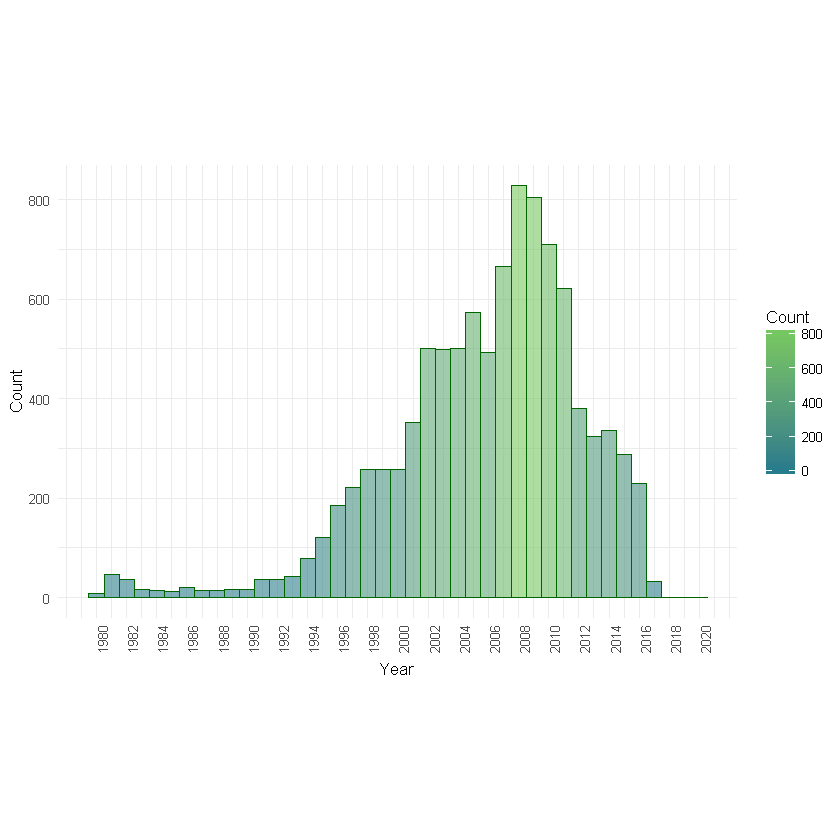

In [140]:
theme_set(theme_minimal(10))

h1 = ggplot(na.omit(vgdata), aes(Year)) +
     geom_histogram(binwidth = 1,
                    aes(fill = ..count..),
                    col = 'darkgreen',
                    alpha = .6) +
    #geom_density(col = "#FF5733", # trend line
    #             aes(y = ..count..),
    #             alpha = 0,
    #             adjust = 2) +
     theme(axis.text.x = element_text(angle = 90, hjust = 1),
           aspect.ratio = 2/3) +
     labs(x = 'Year',
          y = 'Count') +
     scale_fill_gradient("Count", high = "#78c95f", low = "#267b8c") +
     scale_x_continuous(breaks = seq(1980, 2020, by = 2)) 

h1

First worth noting is this chart does not include the 157 rows where ```NA``` was entered for the ```Year```. It's interesting to see that the period from 2007 - 2011 was a peak time in games being released, with 2008 being the highest year overall with new 828 titles. 

This could be due to a wide range of factors, and doesn't necessarily translate into high sales for all of the games that were released. The shape of the data is single-modal, with a rightward skew, showing an overall rise in the number of games released each year over time.

It's also worth noting that the data from 2017 forward is incomplete, as this data pull was done in May 2017, so it may be wise for some explorations to only look at full years counted (2016 or earlier). 

Next it will be interesting to look at a few categorical breakdowns of the data. Also, there appears to be an entry for sales of a games released in 2020, which hasn't happened yet, so this appears to be an outlier. What happens when we look at units shipped per title instead of games released per year?

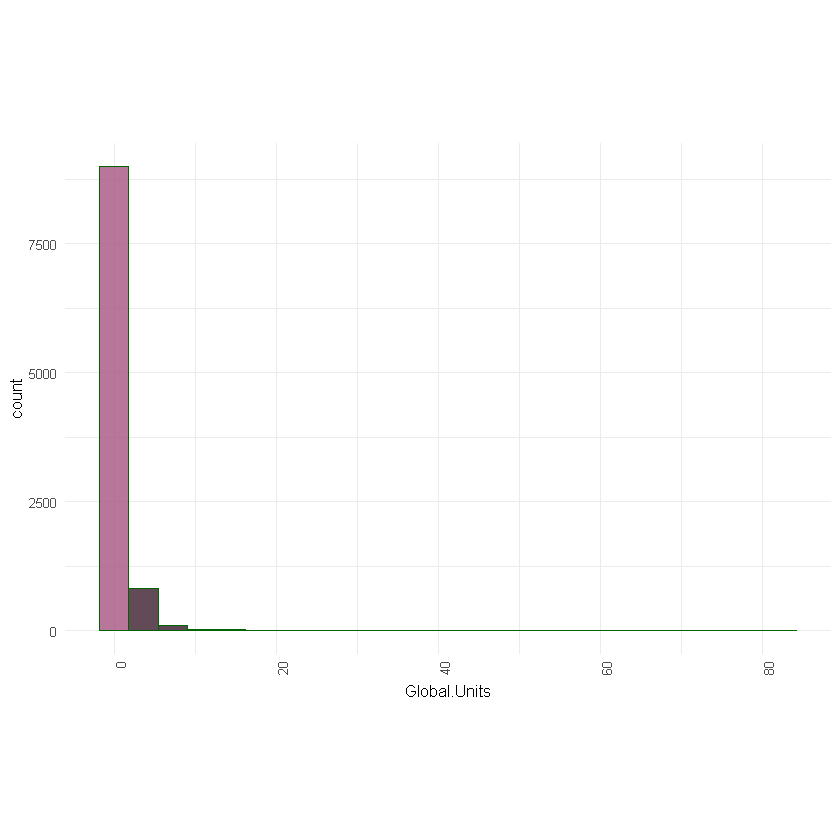

In [41]:
h2 = ggplot(vgdata, aes(Global.Units)) +
     geom_histogram(bins = 24,
                    aes(fill = ..count..),
                    col = 'darkgreen',
                    alpha = .8) +
     theme(axis.text.x = element_text(angle = 90, hjust = 1),
           aspect.ratio = 2/3,
           legend.position = 'none') +
     scale_fill_gradient("Count", high = "#a65481", low = "#311926")

h2

Breaking the global sales figures out in a histogram with 24 bins showing the number of games shipped for each range of values yields a very different histogram than the one for the Years column.

For global sales, there is an extreme leftward skew with a very tall first bar (8000 games that shipped 2 million copies or less), with an extremely long tail getting smaller and smaller as it goes to the right (very few games sell tens of millions of copies). This is interesting, but using a log scale on this plot would be more informative about the distribution of games selling less than a million copies.

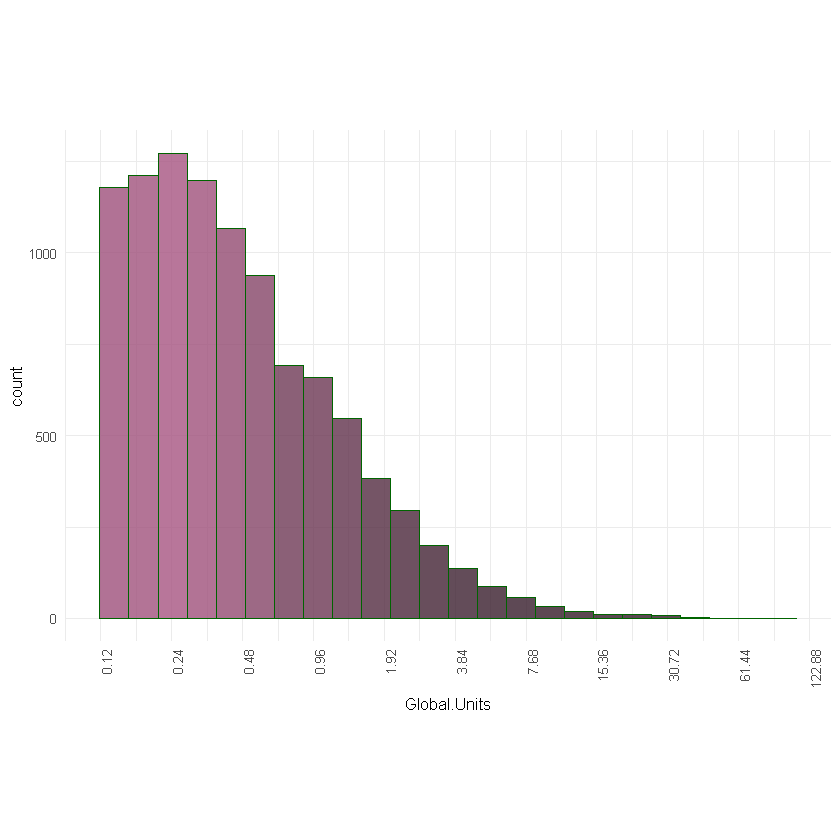

In [42]:
h3 = ggplot(vgdata, aes(Global.Units)) +
     geom_histogram(bins = 24,
                    aes(fill = ..count..),
                    col = 'darkgreen',
                    alpha = .8) +
     theme(axis.text.x = element_text(angle = 90, hjust = 1),
           aspect.ratio = 2/3,
           legend.position = 'none') +
     scale_fill_gradient("Count", high = "#a65481", low = "#311926") +
     scale_x_log10(breaks = c(.12, .24, .48, .96, 1.92, 3.84, 7.68, 15.36, 30.72, 61.44, 122.88))

h3

This is a much more expected distribution of data, with most games selling between 150k - 300k units. The distribution of global units shipped is single modal with a leftward skew, indicating most of the top games have shipped a couple hundred thousand units, with fewer and fewer games shipping millions of units.

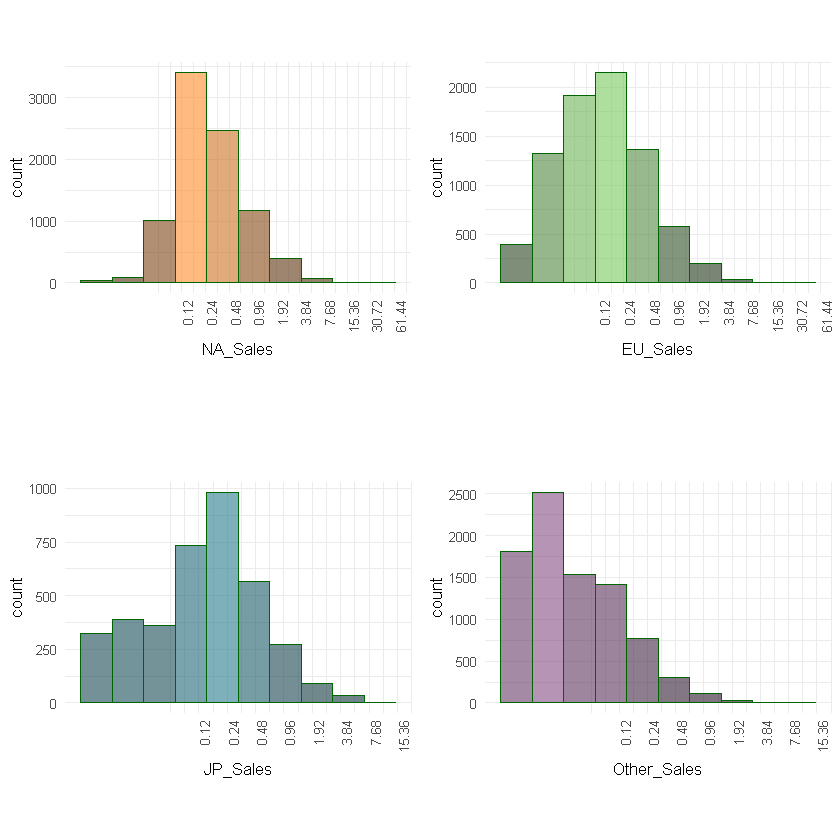

In [36]:
h4 = ggplot(subset(vgdata, NA_Sales > 0), aes(NA_Sales)) +
     geom_histogram(bins = 10,
                    aes(fill = ..count..),
                    col = 'darkgreen',
                    alpha = .6) +
     theme(axis.text.x = element_text(angle = 90, hjust = 1),
           aspect.ratio = 2/3,
           legend.position = 'none') +
     scale_fill_gradient("Count", high = "#ff8e29", low = "#4c2a0c") +
     scale_x_log10(breaks = c(0, .12, .24, .48, .96, 1.92, 3.84, 7.68, 15.36, 30.72, 61.44, 122.88))


h5 = ggplot(subset(vgdata, EU_Sales > 0), aes(EU_Sales)) +
     geom_histogram(bins = 10,
                    aes(fill = ..count..),
                    col = 'darkgreen',
                    alpha = .6) +
     theme(axis.text.x = element_text(angle = 90, hjust = 1),
           aspect.ratio = 2/3,
           legend.position = 'none') +
     scale_fill_gradient("Count", high = "#78c95f", low = "#182813") +
     scale_x_log10(breaks = c(0, .12, .24, .48, .96, 1.92, 3.84, 7.68, 15.36, 30.72, 61.44, 122.88))


h6 = ggplot(subset(vgdata, JP_Sales > 0), aes(JP_Sales)) +
     geom_histogram(bins = 10,
                    aes(fill = ..count..),
                    col = 'darkgreen',
                    alpha = .6) +
     theme(axis.text.x = element_text(angle = 90, hjust = 1),
           aspect.ratio = 2/3,
           legend.position = 'none') +
     scale_fill_gradient("Count", high = "#267b8c", low = "#0f3138") +
     scale_x_log10(breaks = c(0, .12, .24, .48, .96, 1.92, 3.84, 7.68, 15.36, 30.72, 61.44, 122.88))


h7 = ggplot(subset(vgdata, Other_Sales > 0), aes(Other_Sales)) +
     geom_histogram(bins = 10,
                    aes(fill = ..count..),
                    col = 'darkgreen',
                    alpha = .6) +
     theme(axis.text.x = element_text(angle = 90, hjust = 1),
           aspect.ratio = 2/3,
           legend.position = 'none') +
     scale_fill_gradient("Count", high = "#854c85", low = "#271627") +
     scale_x_log10(breaks = c(0, .12, .24, .48, .96, 1.92, 3.84, 7.68, 15.36, 30.72, 61.44, 122.88))

grid.arrange(h4, h5, h6, h7, ncol=2)

When the histogram is broken out by region, log10 no longer works well due to the large number of games in each region that didn't ship enough copies to register in the millions (or any at all), so to understand the long tail data, the dataset needed to be subset. There's a similar leftward skew in all regions, however there is more variation in where games land on the left side (which could be due to the large number of games that never shipped or didn't sell well in some regions).

What this shows is the curve of how games overall tend to ship in each region. It's apparent that globally it's very common for games to ship somewhere between 120k - 240k copies when they've made it into the top 10k bestselling games on VGChartz, however in the Other region, that many units would be considered a even larger success. In NA and EU, blockbuster titles have shipped tens of millions more units than what would be considered a blockbuster in JP and other regions.

### Categorical Values

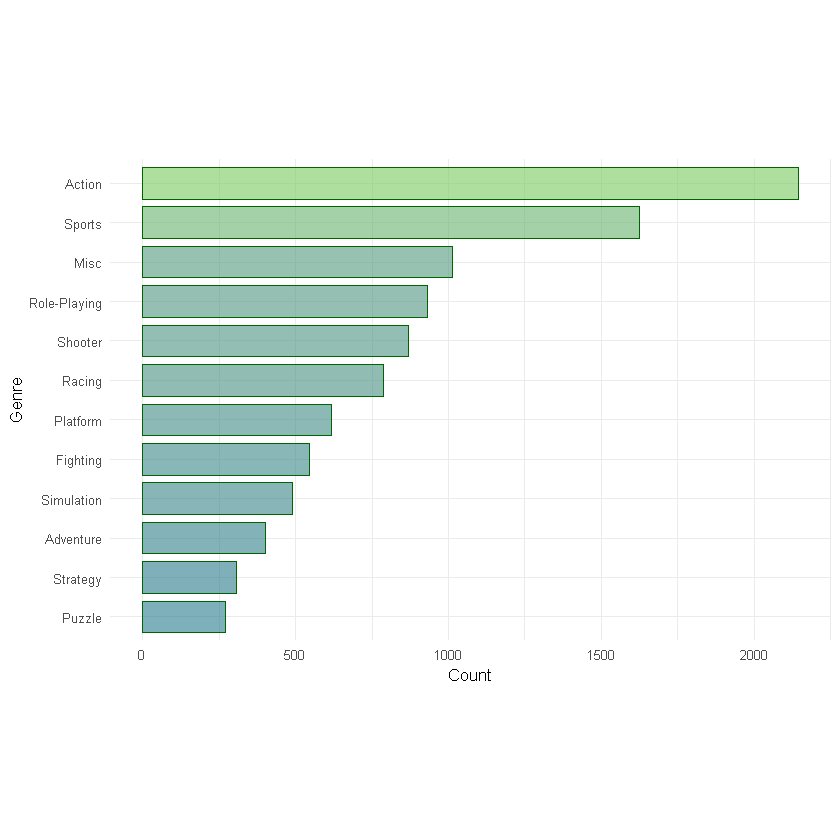

In [113]:
b1 = ggplot(vgdata, aes(x = reorder(Genre,
                                    Genre,
                                    function(x) + length(x)))) +
     geom_bar(aes(fill = ..count..),
              col = 'darkgreen',
              width = .8,
              alpha = .6) +
     theme(aspect.ratio = 2/3,
           legend.position = 'none') +
     labs(x = 'Genre',
          y = 'Count') +
     scale_fill_gradient("Count", high = "#78c95f", low = "#267b8c") +
     coord_flip()
                                        
b1

Somewhat unsurprisingly, Action is the most popular genre of games to release. Sports, is the next most popular genre, followed by Misc. Since 'Misc' isn't a very descriptive field, it will be worth digging into game titles that fall into this category to see if trends can be identified.

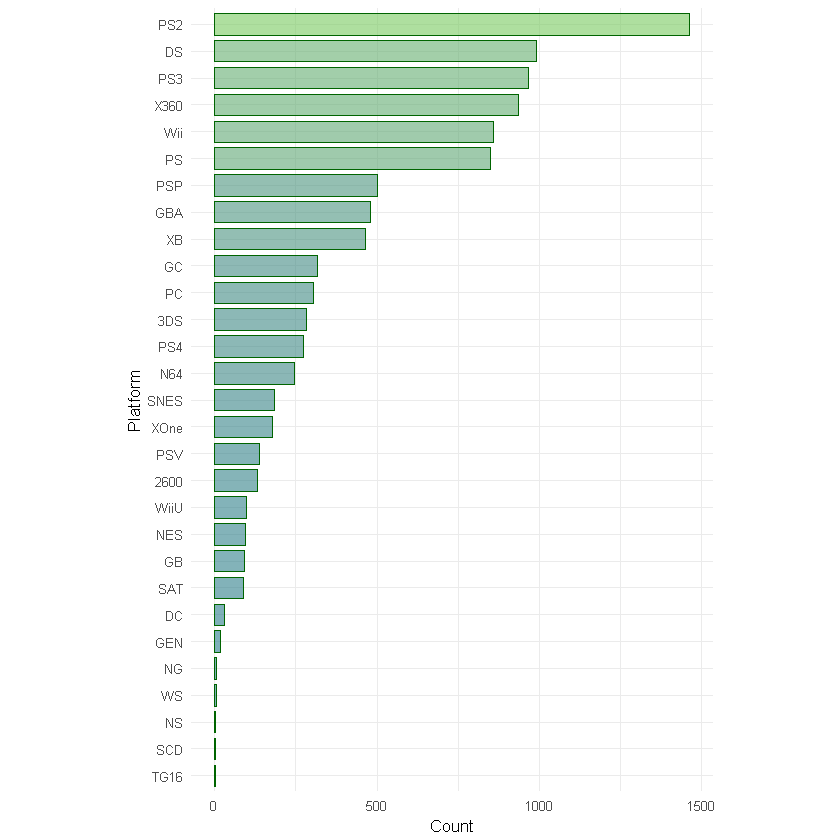

In [31]:
b2 = ggplot(vgdata, aes(x = reorder(Platform,
                                    Platform,
                                    function(x) + length(x)))) +
                                    geom_bar(aes(fill = ..count..),
              col = 'darkgreen',
              width = .8,
              alpha = .6) +
     theme(aspect.ratio = 3/2,
           legend.position = 'none') +
     labs(#title = 'Bar Plot: Video Games Released by Platform',
          #subtitle = 'Worldwide Releases',
          x = 'Platform',
          y = 'Count') +
     scale_fill_gradient("Count", high = "#78c95f", low = "#267b8c") +
     coord_flip()
                                        
b2

When the data is broken down by Platform, it starts becoming extremely varied.

Just looking at the above bar chart, we can see that the most popular system for games titles tracked by VGChartz is the PlayStation 2 (PS2), which has almost half again as many titles published on it than next platform, Nintendo DS (DS). If we were to look at the other categorical variables in univariate plots, readability would be extremely compromised, so it will be more interesting to look at Console_Company and Franchise to group things together a little more.

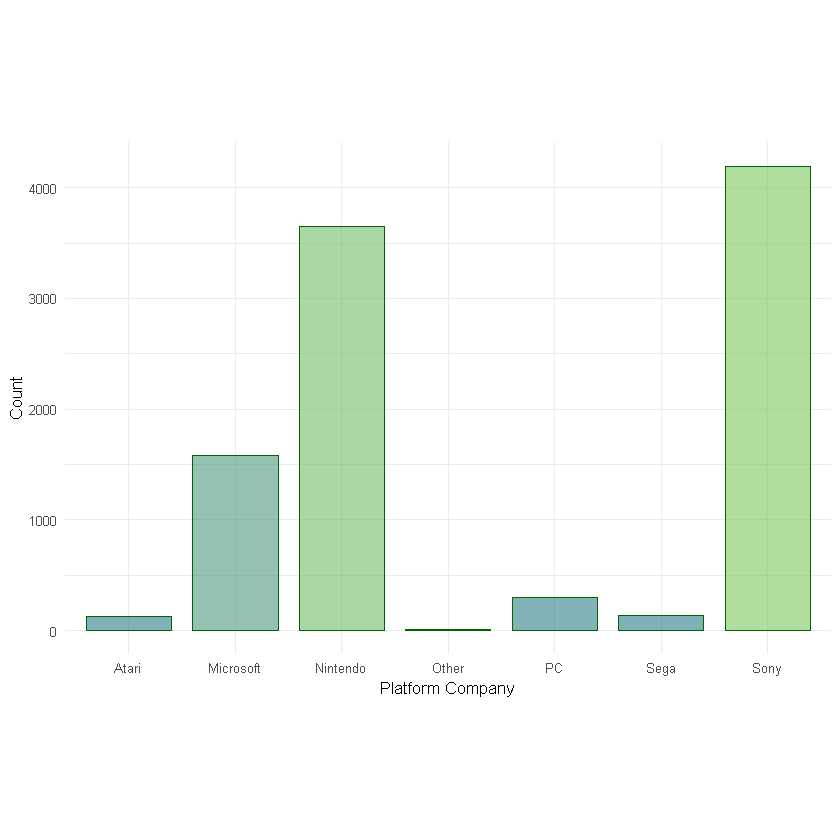

In [112]:
b3 = ggplot(vgdata, aes(x = Console_Company)) +
     geom_bar(aes(fill = ..count..),
              col = 'darkgreen',
              width = .8,
              alpha = .6) +
     theme(aspect.ratio = 2/3,
           legend.position = 'none') +
     labs(x = 'Platform Company',
          y = 'Count') +
     scale_fill_gradient("Count", high = "#78c95f", low = "#267b8c")
                                        
b3

When it comes to titles published on a console, looking at just this plot Sony is winning the console 
wars overall. However, there are other ways to examine the data.

                      Publisher      Count     
 Acclaim Entertainment     : 1   Min.   : 108  
 Activision                : 1   1st Qu.: 141  
 Atari                     : 1   Median : 246  
 Capcom                    : 1   Mean   : 370  
 Disney Interactive Studios: 1   3rd Qu.: 547  
 Eidos Interactive         : 1   Max.   :1145  
 (Other)                   :15                 

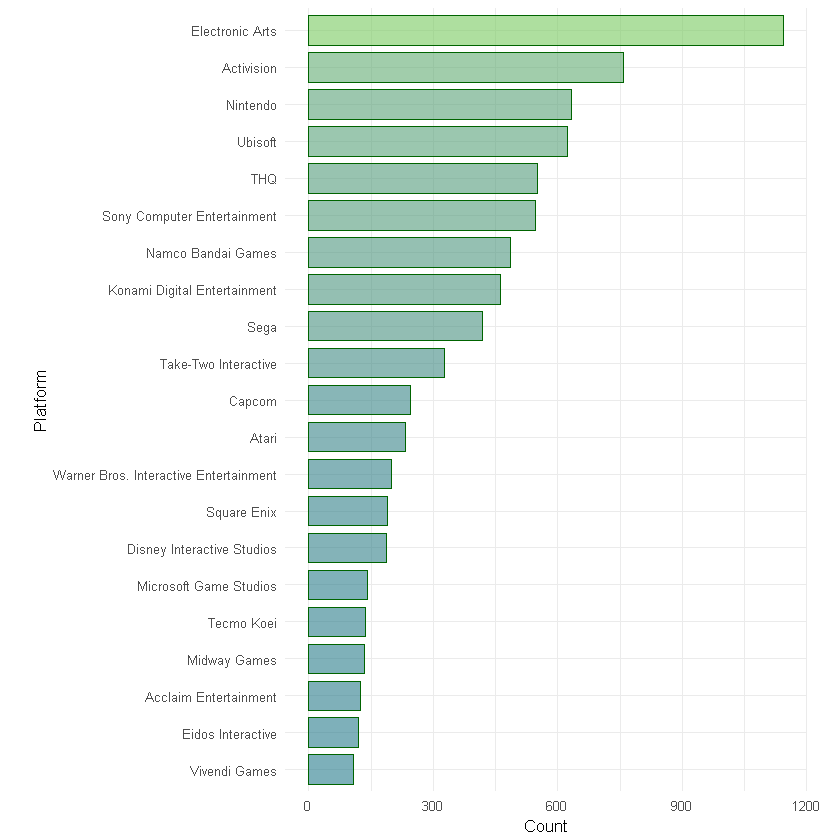

In [114]:
# create new data frame for publisher count
pubs <- data.frame(table(vgdata$Publisher))
colnames(pubs)[colnames(pubs)=='Var1'] <- 'Publisher'
colnames(pubs)[colnames(pubs)=='Freq'] <- 'Count'
Top.Publishers <- subset(pubs, pubs$Count > 100)
summary(Top.Publishers)

b4 = ggplot(Top.Publishers,
            aes(reorder(Publisher, Count), Count)) +
     geom_bar(stat = 'identity',
              aes(fill = Count),
              col = 'darkgreen',
              width = .8,
              alpha = .6) +
     theme(aspect.ratio = 3/2,
           legend.position = 'none') +
     labs(#title = 'Bar Plot: Publishers with Greater Than 100 Game Titles',
          #subtitle = 'Worldwide Releases',
          x = 'Platform',
          y = 'Count') +
     scale_fill_gradient("Count", high = "#78c95f", low = "#267b8c") +
     coord_flip()
                                      
b4

Somewhat interesting (yet unsurprising) to see is that Electronic Arts, then Activision, then Nintendo are the top publishers by count. EA is notorious for shipping yearly games for their sports franchises, and all three companies are some of the largest and most well-known publishers.

This summary gives us a more detailed view into the counts of games published for all publishers with more than 100 games on the market. These are the most prolific, and also the most recognizable, publishers in the industry, however publishing a lot of games is not an indication that those games shipped a large quantity.

                           Name        Count       
 Cars                        : 1   Min.   : 7.000  
 FIFA 14                     : 1   1st Qu.: 7.000  
 FIFA 15                     : 1   Median : 7.000  
 FIFA Soccer 11              : 1   Mean   : 7.577  
 FIFA Soccer 13              : 1   3rd Qu.: 8.000  
 Lego Batman 3: Beyond Gotham: 1   Max.   :11.000  
 (Other)                     :20                   

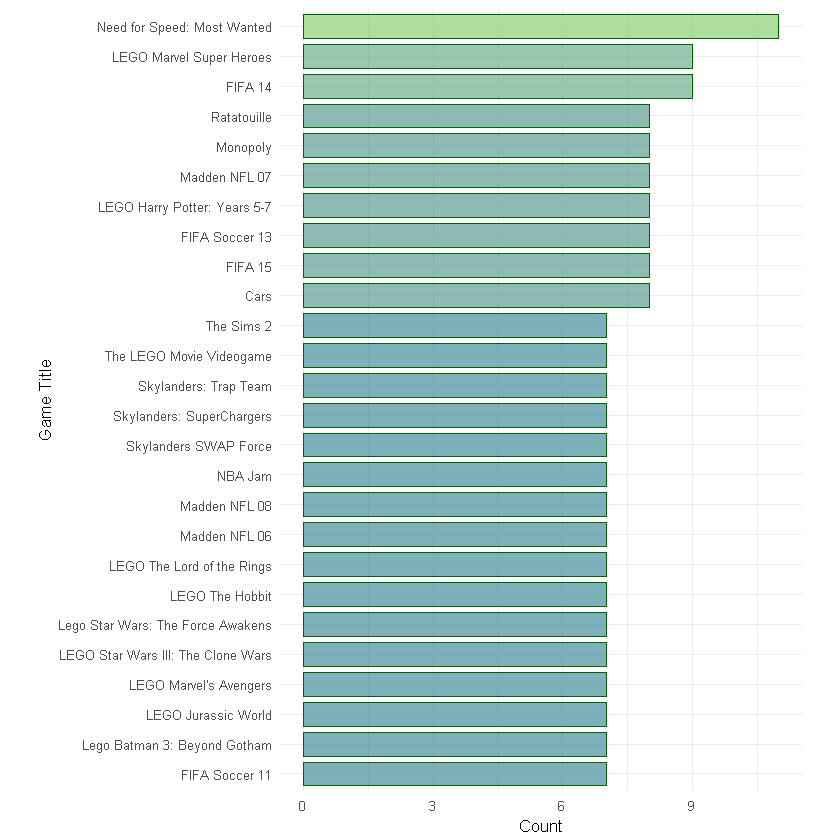

In [34]:
# create new data frame for name count
names <- data.frame(table(vgdata$Name))
colnames(names)[colnames(names)=='Var1'] <- 'Name'
colnames(names)[colnames(names)=='Freq'] <- 'Count'
Top.Names <- subset(names, names$Count >= 7)
summary(Top.Names)

b5 = ggplot(Top.Names,
            aes(reorder(Name, Count), Count)) +
     geom_bar(stat = 'identity',
              aes(fill = Count),
              col = 'darkgreen',
              width = .8,
              alpha = .6) +
     theme_set(theme_minimal(10)) +
     theme(aspect.ratio = 3/2,
           legend.position = 'none') +
     labs(#title = 'Bar Graph: Game Titles on the Most Platforms',
          #subtitle = 'Worldwide Releases',
          x = 'Game Title',
          y = 'Count') +
     scale_fill_gradient("Count", high = "#78c95f", low = "#267b8c") +
     coord_flip()
                                      
b5

At first glance, this chart is blocky and less interesting than the previous 
ones, however when looking at the game titles themselves, there are some 
immediate observations. First, it becomes clear that if a game title is showing
up more than once, it's been published on more than one platform.

This chart shows just how many of the most cross-published video games are LEGO
related. Beyond that, there's some other noticeable patterns in the game titles.
This is going to be a really interesting column to drill down into further,
so we'll look at Franchise data. This could also lead to some scenarios where
we might need to consider duplicated counting.

It should be noted that Franchise data has been limited to popular and 
frequently occurring titles.

            Franchise      Count       
 Assassin's Creed: 1   Min.   : 10.00  
 Batman          : 1   1st Qu.: 24.00  
 Battlefield     : 1   Median : 36.50  
 BioShock        : 1   Mean   : 44.70  
 Borderlands     : 1   3rd Qu.: 54.25  
 Call of Duty    : 1   Max.   :146.00  
 (Other)         :34                   

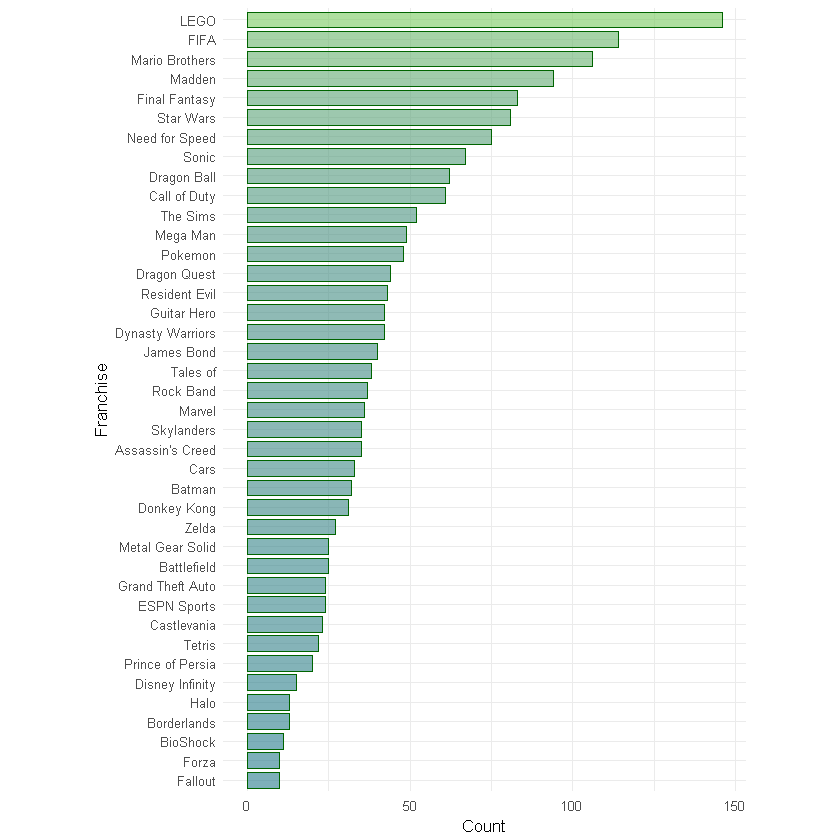

In [35]:
# create new data frame for franchise count
frans <- data.frame(table(vgdata$Franchise))
colnames(frans)[colnames(frans)=='Var1'] <- 'Franchise'
colnames(frans)[colnames(frans)=='Freq'] <- 'Count'
Top.Franchises <- subset(frans, Franchise != 'Other')
summary(Top.Franchises)

b6 = ggplot(Top.Franchises,
            aes(reorder(Franchise, Count), Count)) +
     geom_bar(stat = 'identity',
              aes(fill = Count),
              col = 'darkgreen',
              width = .8,
              alpha = .6) +
     theme_set(theme_minimal(10)) +
     theme(aspect.ratio = 3/2,
           legend.position = 'none') +
     labs(#title = 'Bar Graph: Game Titles on the Most Platforms',
          #subtitle = 'Worldwide Releases',
          x = 'Franchise',
          y = 'Count') +
     scale_fill_gradient("Count", high = "#78c95f", low = "#267b8c") +
     coord_flip()
                                      
b6

It's interesting to see which franchises have released the most games, however this data might be better viewed as a bivariate comparison of Franchise vs units shipped instead of a count of titles shipped, since titles can occur on more than one platform.

# Univariate Analysis

### What is the structure of your dataset?

In [59]:
#```{r echo=FALSE, VGData_Structure}
str(vgdata)
#```

'data.frame':	10000 obs. of  13 variables:
 $ Name           : Factor w/ 6838 levels "'98 Koshien",..: 6531 5524 3199 6533 4357 5758 3934 6529 3937 1541 ...
 $ Platform       : Factor w/ 29 levels "2600","3DS","DC",..: 24 10 24 24 5 5 4 24 24 10 ...
 $ Year           : num  2006 1985 2008 2009 1996 ...
 $ Genre          : Factor w/ 12 levels "Action","Adventure",..: 11 5 7 11 8 6 5 4 5 9 ...
 $ Publisher      : Factor w/ 338 levels "20th Century Fox Video Games",..: 207 207 207 207 207 207 207 207 207 207 ...
 $ NA_Sales       : num  41.4 29.1 15.7 15.6 11.3 ...
 $ EU_Sales       : num  28.96 3.58 12.84 10.94 8.89 ...
 $ JP_Sales       : num  3.77 6.81 3.8 3.29 10.22 ...
 $ Other_Sales    : num  8.45 0.77 3.29 2.95 1 0.58 2.88 2.84 2.25 0.47 ...
 $ Global_Sales   : num  82.5 40.2 35.6 32.8 31.4 ...
 $ Decade         : Factor w/ 5 levels "00s","10s","20s",..: 1 4 1 1 5 4 1 1 1 4 ...
 $ Franchise      : Factor w/ 45 levels "Assassin's Creed",..: 34 29 29 34 35 34 29 34 29 34 ...
 $ Conso

Converting the data frame to a string shows a basic breakdown of how the data
was ingested. The Year column is showing as a factor due to the 'N/A' values.
It should be a continuous variable, so this will need to be taken into
consideration as the analysis progresses.

There are 10,001 rows broken out across 13 variables. When broken down by year,
the shape of the data is single-modal, with a rightward skew, showing an 
overall rise in the number of games released each year over time. Of the Top 10k
games with the most units shipped, the minimum was 120,000 units, and the 
maximum was 82.54 million units globally.


### What is/are the main feature(s) of interest in your dataset?

VGChartz exists to track game sales in millions across global regions. The
data consists of categorical columns, and the year column (independent 
variables), as well as numeric columns for sales in millions of units (Global 
Sales; dependent variable). When properly rearranged, the dependent variable 
can be drilled down by Region. All categorical columns contain data  of interest 
and could affect the number of unit shipped regionally or globally.


### What other features in the dataset do you think will help support your investigation into your feature(s) of interest?

In [60]:
#```{r echo=FALSE, VGData_Correlation}
cor(games.corr, method = 'pearson')
#```

,NA.Units,EU.Units,JP.Units,Other.Units,Global.Units
NA.Units,1.0000000,0.7503898,0.4292556,0.6233701,0.9365152
EU.Units,0.7503898,1.0000000,0.4152400,0.7150651,0.8963314
JP.Units,0.4292556,0.4152400,1.0000000,0.2682371,0.5981830
Other.Units,0.6233701,0.7150651,0.2682371,1.0000000,0.7405071
Global.Units,0.9365152,0.8963314,0.5981830,0.7405071,1.0000000


Taking a look at correlation between games sales across regions could help 
predict if sales in one region based on another regions sales. This is more
informative than just looking at global units shipped alone.

Additionally, the Name column is going to prove very interesting when looking 
at total sales, and cross comparing other columns. Using regexes to find 
titles that are part of popular series will be value in determining if a game
should sell well.



### Did you create any new variables from existing variables in the dataset?

I created three new columns of data organizing the information that was in the dataset. One column for decade a game title was released (based on the Year column), one column for Series (based on frequently occurring game titles and popular franchises), and one column for Console_Company to better visualize the competition between the big three console makers.

Additionally, I've created new summarized datasets to view the information in different ways.


### Of the features you investigated, were there any unusual distributions?

There didn't appear to be any unusual distributions when broken out by year, though it 
was interesting to see that games published per year peaked in 2008, and hasn't 
continued to rise. This could be due to a lot of factors.

When examining the Global_Sales data in a histogram using log scale, there was a
single-modal, leftward skewed distribution, which fell within expectations that
most games don't ship more than a million units.


### Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

This data was obtained on 5/22/2017 using a Python3 script, and importing 
BeautifulSoup to parse out the HTML data. After the dataset was scraped from 
the table on VGChartz website, it was then limited to the top 10,000 rows, and
formatted using a data frame before being output to CSV for use in R. Since the 
games are ranked by units shipped, they can be ordered by Global_Sales, so Rank
data isn't really important and was dropped. I also generated new columns based
on data the existing dataset contained, since grouping the categorical data a
bit more would allow for answering a wider variety of questions.

Aside from this, the data was left in it's original state, as it was downloaded
in a tidy format. When working with the data in R, numerical values needed to be
transformed into numeric, and categorical variables were transformed into
factors.

# Bivariate Plots Section

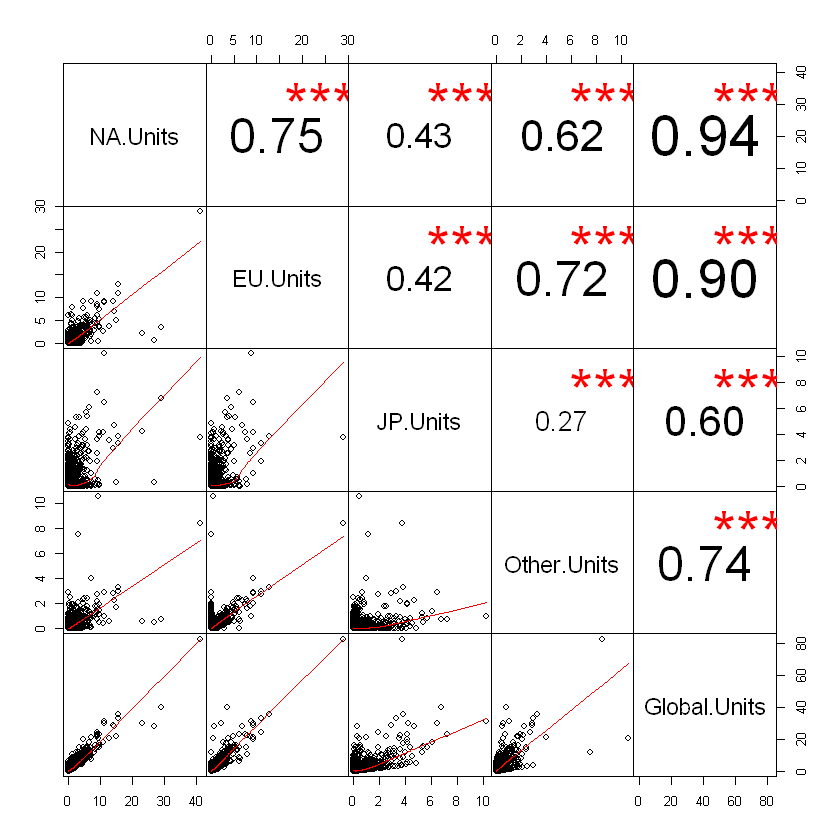

In [61]:
#Reference:  https://stackoverflow.com/questions/16194212/how-to-suppress-warnings-globally-in-an-r-script
oldw <- getOption("warn")
options(warn = -1)

games.corr <- data.frame(NA.Units, 
                         EU.Units,
                         JP.Units, 
                         Other.Units,
                         Global.Units)

melt.corr <- melt(cor(games.corr))

#Reference:  http://www.sthda.com/english/wiki/correlation-matrix-formatting-and-visualization#at_pco=smlwn-1.0&at_si=5927942aff9eb0fb&at_ab=per-2&at_pos=0&at_tot=1
cp1 <- chart.Correlation(games.corr, 
                         histogram = FALSE)

options(warn = oldw)

Taking a look at correlation between video game units shipped across regions could help predict sales in one region based on another regions units. This correlation matrix compares numeric values from the dataset (aside from year). In general, if a game sells well in North America, this shows it does well in Europe, and globally. It will be interesting to see how the categorical values impact numerical ones in bivariate and multivariate exploration. We can see that most regions have at least strong or moderate positive correlation with each other, with a exception for JP/Other which have weak positive correlation.

In [62]:
summary(games.corr)

    NA.Units          EU.Units          JP.Units        Other.Units     
 Min.   : 0.0000   Min.   : 0.0000   Min.   : 0.0000   Min.   : 0.0000  
 1st Qu.: 0.1000   1st Qu.: 0.0200   1st Qu.: 0.0000   1st Qu.: 0.0100  
 Median : 0.1900   Median : 0.0800   Median : 0.0000   Median : 0.0300  
 Mean   : 0.4304   Mean   : 0.2412   Mean   : 0.1207   Mean   : 0.0791  
 3rd Qu.: 0.4300   3rd Qu.: 0.2200   3rd Qu.: 0.0900   3rd Qu.: 0.0700  
 Max.   :41.3600   Max.   :28.9600   Max.   :10.2200   Max.   :10.5700  
  Global.Units    
 Min.   : 0.1200  
 1st Qu.: 0.2100  
 Median : 0.3900  
 Mean   : 0.8714  
 3rd Qu.: 0.8400  
 Max.   :82.5400  

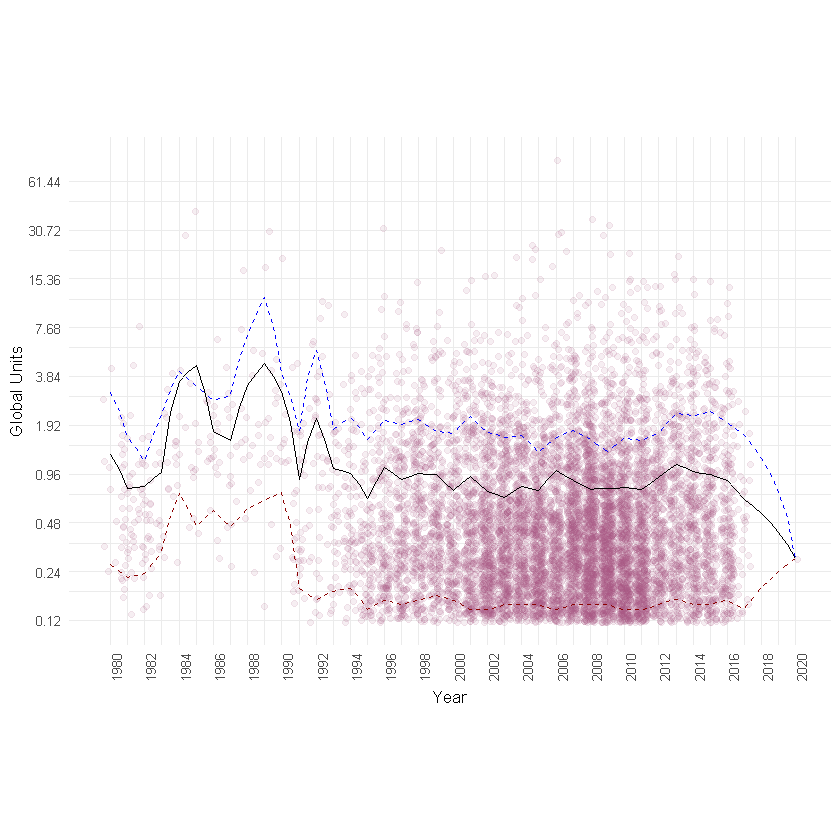

In [63]:
#Scatter plot for mean and qualitle for global units shippeed
pp1 = ggplot(na.omit(vgdata), aes(Year, Global_Sales)) +
      geom_point(col = '#a65481',
                 alpha = .1,
                 position = 'jitter') +
      geom_line(stat = 'summary',
                fun.y = quantile, 
                fun.args=list(probs=0.1),
                linetype = 2,
                col = 'darkred') +
      geom_line(stat = 'summary',
                fun.y = quantile, 
                fun.args=list(probs=0.9),
                linetype = 2,
                col = 'blue') +
      geom_line(stat = 'summary', fun.y = mean) +
      theme(axis.text.x = element_text(angle = 90, 
                                       hjust = 1),
            aspect.ratio = 2/3) +
      labs(x = 'Year',
           y = 'Global Units') +
      coord_trans(y = 'log10') +
      scale_x_continuous(breaks = seq(1980, 2020, by = 2)) +
      scale_y_continuous(breaks = c(.12, .24, .48, .96, 1.92, 3.84, 7.68, 15.36, 30.72, 61.44, 122.88))

pp1

The jittered point plot showing number of units shipped per game per year shows some really interesting patterns. This plot was done with a log scale on the Y axis to better visualize the price breakdowns of the long tail global sales data. The black line shows the mean, the dotted blue is the 90th percent quantile, and the dotted red line is the 10% quantile.

Once the plot is generated, on the low end of the graph for games that shipped between 120k and 180k unit, there is some very obvious horizontal striping. This occurs because the way the data is tracked by VGCharts is a 2 decimal value representing millions. For games with only a couple hundred thousand units shipped, there are only so many levels to track these values with two decimal places. We can see in the early years of video games, not nearly as many games were made, and of the ones that were made, most shipped a lot of copies. This continued into the early 90's, when a lot more games started saturating the market. Since there is such a big difference in number of games made over the years, this would be interesting to visualize with averages.

Showing average global units shipped by year on an overlaid line plot gives a much clearer picture of the observations from the point plot, so I added a summary line by mean. There are two large spikes in 1985 and 1989 where the average units shipped per title was over 4 million. This is exceptionally high compared to the much more stable average over the last 20 years of about 750k - 1 million units per title through 2016. What if we look at these numbers split out by region?

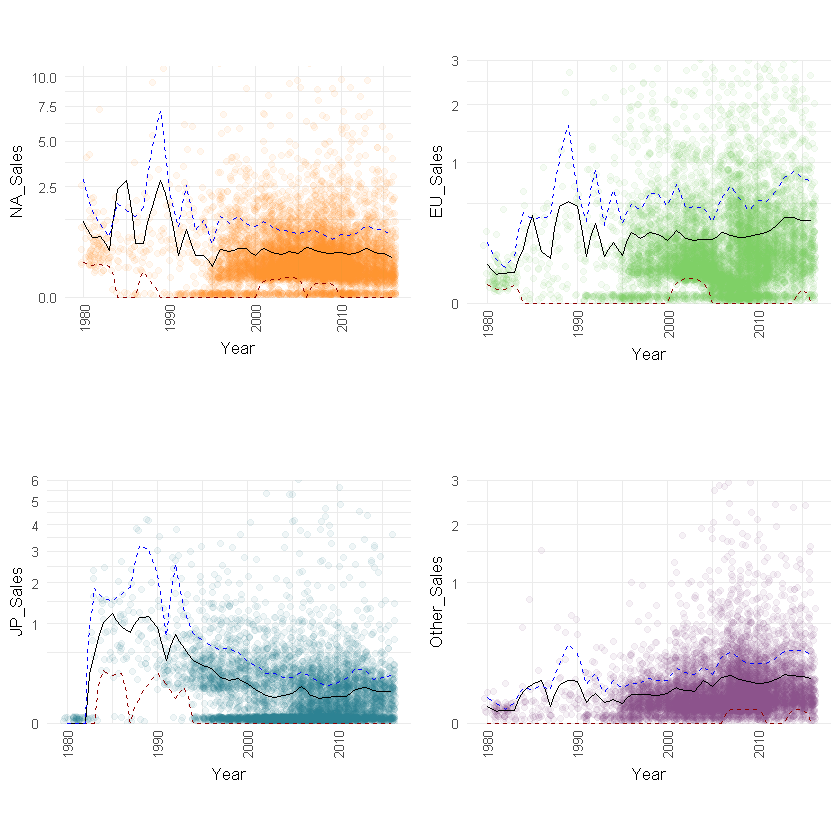

In [149]:
oldw <- getOption("warn")
options(warn = -1)
theme_set(theme_minimal(10))


Full.Year <- subset(vgdata, Year <= 2016)

pp2 = ggplot(na.omit(Full.Year), aes(Year, NA_Sales)) +
      geom_point(col = '#ff8e29',
                 alpha = .07,
                 position = 'jitter') +
      geom_line(stat = 'summary', fun.y = mean) +
      geom_line(stat = 'summary',
                fun.y = quantile, 
                fun.args=list(probs=0.1),
                linetype = 2,
                col = 'darkred') +
      geom_line(stat = 'summary',
                fun.y = quantile, 
                fun.args=list(probs=0.9),
                linetype = 2,
                col = 'blue') +
      theme(axis.text.x = element_text(angle = 90, 
                                       hjust = 1,
                                       vjust = .5),
           aspect.ratio = 2/3) +
      coord_trans(y = 'sqrt', limy = c(0, 11))


pp3 = ggplot(na.omit(Full.Year), aes(Year, EU_Sales)) +
      geom_point(col = '#78c95f',
                 alpha = .07,
                 position = 'jitter') +
      geom_line(stat = 'summary', fun.y = mean) +
      geom_line(stat = 'summary',
                fun.y = quantile, 
                fun.args=list(probs=0.1),
                linetype = 2,
                col = 'darkred') +
      geom_line(stat = 'summary',
                fun.y = quantile, 
                fun.args=list(probs=0.9),
                linetype = 2,
                col = 'blue') +
      theme(axis.text.x = element_text(angle = 90, 
                                       hjust = 1,
                                       vjust = .5),
           aspect.ratio = 2/3) +
      coord_trans(y = 'sqrt', limy = c(0, 3))

pp4 = ggplot(na.omit(Full.Year), aes(Year, JP_Sales)) +
      geom_point(col = '#267b8c',
                 alpha = .07,
                 position = 'jitter') +
      geom_line(stat = 'summary', fun.y = mean) +
      geom_line(stat = 'summary',
                fun.y = quantile, 
                fun.args=list(probs=0.1),
                linetype = 2,
                col = 'darkred') +
      geom_line(stat = 'summary',
                fun.y = quantile, 
                fun.args=list(probs=0.9),
                linetype = 2,
                col = 'blue') +
      theme(axis.text.x = element_text(angle = 90, 
                                       hjust = 1,
                                       vjust = .5),
           aspect.ratio = 2/3) +
      coord_trans(y = 'sqrt', limy = c(0, 6))

pp5 = ggplot(na.omit(Full.Year), aes(Year, Other_Sales)) +
      geom_point(col = '#854c85',
                 alpha = .07,
                 position = 'jitter') +
      geom_line(stat = 'summary', fun.y = mean) +
      geom_line(stat = 'summary',
                fun.y = quantile, 
                fun.args=list(probs=0.1),
                linetype = 2,
                col = 'darkred') +
      geom_line(stat = 'summary',
                fun.y = quantile, 
                fun.args=list(probs=0.9),
                linetype = 2,
                col = 'blue') +
      theme(axis.text.x = element_text(angle = 90, 
                                       hjust = 1,
                                       vjust = .5),
           aspect.ratio = 2/3) +
      coord_trans(y = 'sqrt', limy = c(0, 3))

grid.arrange(pp2, pp3, pp4, pp5, ncol=2)


options(warn = oldw)

This plot takes the Global.Units scatter plots, and cleans it up by breaking it out regionally. The plots use sqrt instead of log10 so we can take into account zero units shipped in a region. These visualizations give a lot more information when broken out by region. Since regions are columns, each region has been plotted together on a grid area since they couldn't be easily faceted like a value. This problem was remedied for other plots by melting the data, however this visualization ended up working for this, so I kept it as it is. 

The plot for NA (North America, not N/A) ticks up to 11 million units, while the plots for EU and Other tick to 3 million, and the JP plot ticks to 6 million. For Japan, the low trend seems to make sense since it's only a single country, while it's somewhat surprising that places in Other (like the rest of Asia, and South America) don't generate more shipped units. Since these views are zoomed in, not all Y-axis outliers are visible, and only values from complete years (2016 or earlier) are shown.

In each region, we can still clearly see bumps around 1985 and 1989, so the great successes that shipped millions of units those years did so globally. Games represented by a dot above the 90th percentile line have done exceptionally well on the market in that region. Additionally, the solid stripe on the bottom of each region indicates games that shipped zero in that region, so perhaps they weren't released there, or didn't ship enough copies to be counted as millions. 

For Japan, it's interesting to see that average units shipped has dropped and leveled out over time as the number of titles released increased (we see this pattern in NA, too). It also looks like there is a lot of games that didn't ship or do well there, as JP has the most defined bottom stripe. Maybe it really is impressive if something is big in Japan! For EU and Other regions, there has been a gradual increase is sales as the years go on, likely due in part to a slower market saturation in those areas. 

For the last 20 years, it's been common for games to ship around 250k or more copies in NA and EU, while JP and Other each average about half of that.

In [105]:
Summary.Genre = na.omit(vgdata) %>%
                  group_by(Genre) %>%
                  summarise(NA.Sum = sum(NA_Sales),
                            NA.Mean = mean(NA_Sales),
                            NA.Median = median(NA_Sales),
                            NA.Quant.90 = quantile(NA_Sales, probs = .9),
                            NA.Quant.10 = quantile(NA_Sales, probs = .1),
                            EU.Sum = sum(EU_Sales),
                            EU.Mean = mean(EU_Sales),
                            EU.Median = median(EU_Sales),
                            EU.Quant.90 = quantile(EU_Sales, probs = .9),
                            EU.Quant.10 = quantile(EU_Sales, probs = .1),
                            JP.Sum = sum(JP_Sales),
                            JP.Mean = mean(JP_Sales),
                            JP.Median = median(JP_Sales),
                            JP.Quant.90 = quantile(JP_Sales, probs = .9),
                            JP.Quant.10 = quantile(JP_Sales, probs = .1),
                            Other.Sum = sum(Other_Sales),
                            Other.Mean = mean(Other_Sales),
                            Other.Median = median(Other_Sales),
                            Other.Quant.90 = quantile(Other_Sales, probs = .9),
                            Other.Quant.10 = quantile(Other_Sales, probs = .1),
                            Global.Sum = sum(Global_Sales),
                            Global.Mean = mean(Global_Sales),
                            Global.Median = median(Global_Sales),
                            Global.Quant.90 = quantile(Global_Sales, probs = .9),
                            Global.Quant.10 = quantile(Global_Sales, probs = .1),
                            Count = n()) %>%
              mutate(Percent = Count/sum(Count)) %>%
              arrange(Genre)

#head(Summary.Genre)

vgdata$Genre 
       n  missing distinct 
   10000        0       12 

Action (2146, 0.215), Adventure (402, 0.040), Fighting (545, 0.054), Misc
(1013, 0.101), Platform (618, 0.062), Puzzle (271, 0.027), Racing (788, 0.079),
Role-Playing (930, 0.093), Shooter (869, 0.087), Simulation (488, 0.049),
Sports (1625, 0.162), Strategy (305, 0.030)

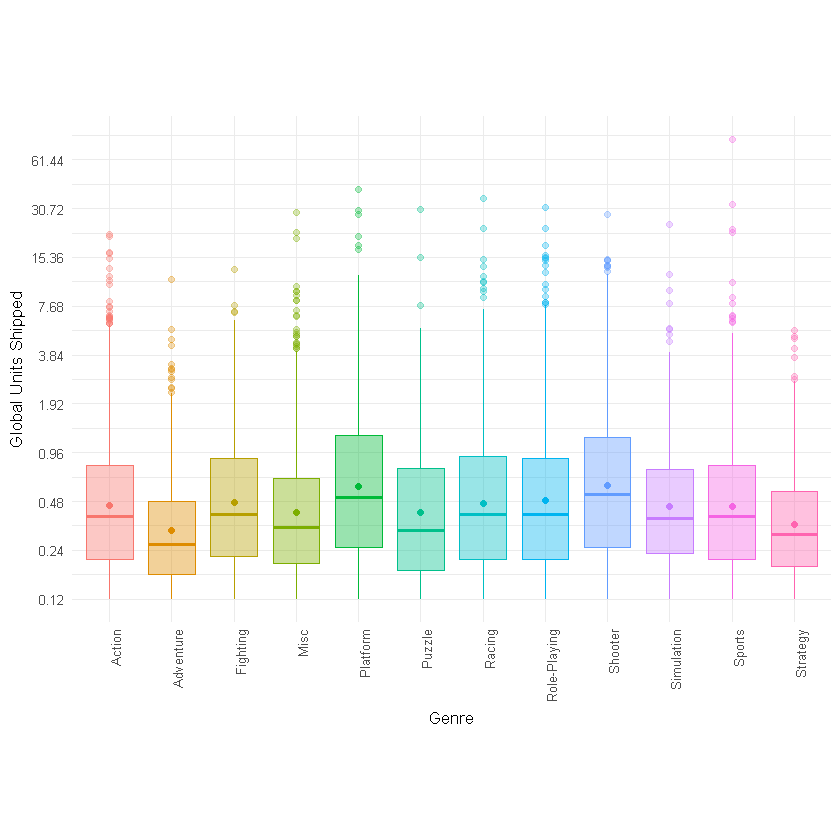

In [327]:
#describe.by(units, group = vgdata$Genre)
describe(vgdata$Genre)


bp1 = ggplot(vgdata, aes(x = Genre, 
                         y = Global.Units,
                         color = Genre)) +
      geom_boxplot(outlier.color = NULL,
                   outlier.alpha = .3,
                   aes(fill = Genre),
                   alpha = .4) +
      geom_point(stat = 'summary', 
                aes(group = 1, 
                    col = Genre), 
                fun.y = mean) +   
      theme(axis.text.x = element_text(angle = 90, hjust = 1),
           aspect.ratio = 2/3,
           legend.position = 'none') +
      labs(x = 'Genre',
          y = 'Global Units Shipped') +
      scale_y_log10(breaks = c(.12, .24, .48, .96, 1.92, 3.84, 7.68, 15.36, 30.72, 61.44, 122.88))
                                        
bp1

This boxplot shows the breakdown of units shipped by genre. The dot in the 
middle of each box is a scatterplot I've added to represent the mean, since 
the line of the box and whiskers shows median. This shows a lot of the same 
strengths we saw in the univariate plot for genre, though it's interesting to 
see that Sports has so many upper bounded outliers, and it's Platform games 
that have the highest upper quartile.

vgdata$Platform 
       n  missing distinct 
   10000        0       29 

lowest : 2600 3DS  DC   DS   GB  , highest: WiiU WS   X360 XB   XOne

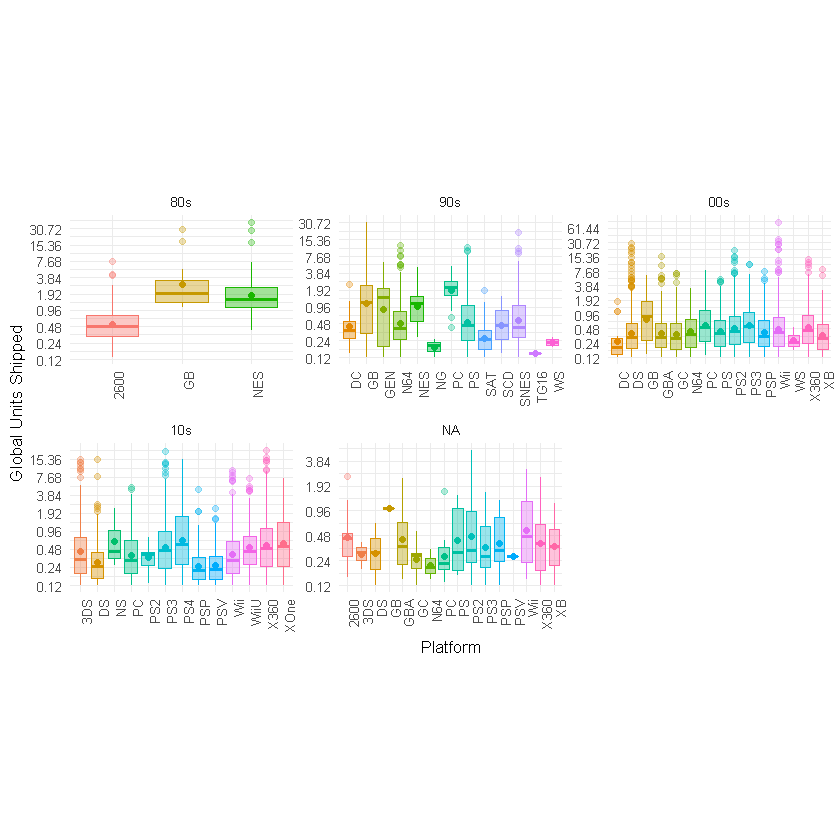

In [320]:
#describe.by(units, group = vgdata$Platform)
describe(vgdata$Platform)

bp2 = ggplot(vgdata, aes(x = Platform, 
                         y = Global_Sales,
                         color = Platform)) +
      geom_boxplot(outlier.color = NULL,
                   outlier.alpha = .3,
                   aes(fill = Platform),
                   alpha = .4) +
      geom_point(stat = 'summary', 
                aes(group = 1, 
                    col = Platform), 
                fun.y = mean) +   
      theme(axis.text.x = element_text(angle = 90, hjust = 1),
           aspect.ratio = 2/3,
           legend.position = 'none') +
      labs(x = 'Platform',
          y = 'Global Units Shipped') +
      scale_y_log10(breaks = c(.12, .24, .48, .96, 1.92, 3.84, 7.68, 15.36, 30.72, 61.44, 122.88)) +
      facet_wrap(~factor(Decade,  
                         levels = c("80s", "90s", "00s", "10s")), 
                 scales = 'free',
                 nrow = 2)
                                        
bp2

Looking at a boxplot broken down by platform gives a really cool view into some information about the successes of each platform.Faceting these plots by decades gives us a timeline of when different consoles were most popular, and for the 80s, 90s, 00s, and 10s you can see the generational changeovers for electronics as certain consoles were phased out and others were phased in.

Unfortunately, any games that didn't have a year land in the NA bin, but they are still worth looking at, as we can probably make some assumptions about which decades some of those NAs might have landed based on console generations.

In [63]:
Summary.Decade = na.omit(vgdata) %>%
                  group_by(Decade) %>%
                  summarise(NA.Sum = sum(NA_Sales),
                            NA.Mean = mean(NA_Sales),
                            NA.Median = median(NA_Sales),
                            NA.Quant.90 = quantile(NA_Sales, probs = .9),
                            NA.Quant.10 = quantile(NA_Sales, probs = .1),
                            EU.Sum = sum(EU_Sales),
                            EU.Mean = mean(EU_Sales),
                            EU.Median = median(EU_Sales),
                            EU.Quant.90 = quantile(EU_Sales, probs = .9),
                            EU.Quant.10 = quantile(EU_Sales, probs = .1),
                            JP.Sum = sum(JP_Sales),
                            JP.Mean = mean(JP_Sales),
                            JP.Median = median(JP_Sales),
                            JP.Quant.90 = quantile(JP_Sales, probs = .9),
                            JP.Quant.10 = quantile(JP_Sales, probs = .1),
                            Other.Sum = sum(Other_Sales),
                            Other.Mean = mean(Other_Sales),
                            Other.Median = median(Other_Sales),
                            Other.Quant.90 = quantile(Other_Sales,
                                probs = .9),
                            Other.Quant.10 = quantile(Other_Sales,
                                probs = .1),
                            Global.Sum = sum(Global_Sales),
                            Global.Mean = mean(Global_Sales),
                            Global.Median = median(Global_Sales),
                            Global.Quant.90 = quantile(Global_Sales,
                                probs = .9),
                            Global.Quant.10 = quantile(Global_Sales,
                                probs = .1),
                            Count = n()) %>%
              arrange(Decade)

#Summary.Decade

vgdata$Decade 
       n  missing distinct 
    9843      157        5 
                                        
Value        00s   10s   20s   80s   90s
Frequency   5471  2920     1   199  1252
Proportion 0.556 0.297 0.000 0.020 0.127

vgdata$Console_Company 
       n  missing distinct 
   10000        0        7 
                                                                      
Value          Atari Microsoft  Nintendo     Other        PC      Sega
Frequency        131      1578      3645        12       304       136
Proportion     0.013     0.158     0.364     0.001     0.030     0.014
                    
Value           Sony
Frequency       4194
Proportion     0.419

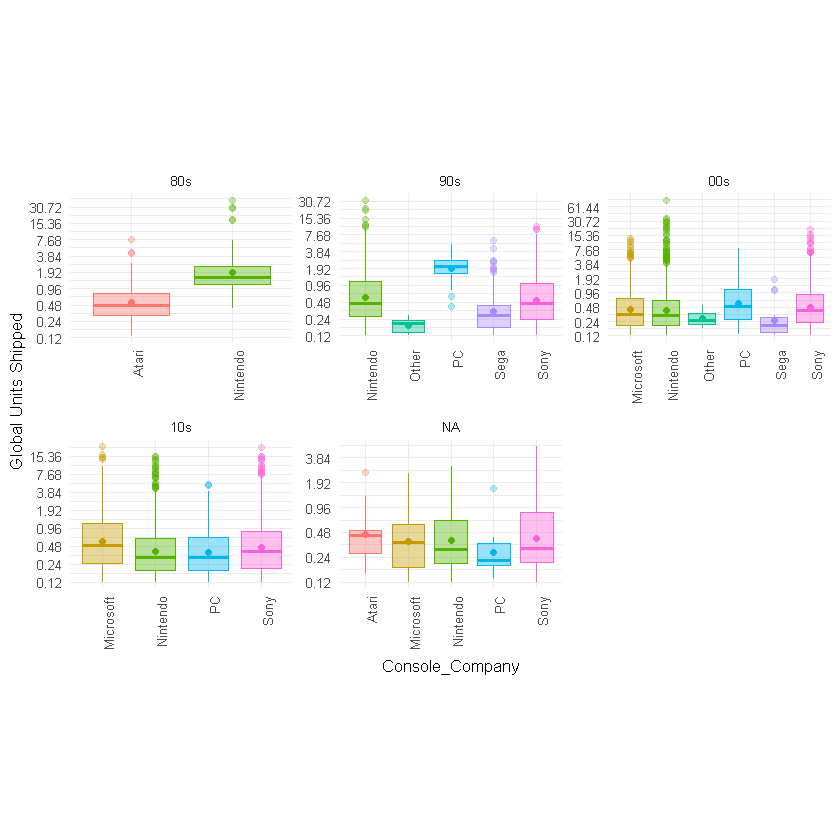

In [321]:
#describe.by(units, group = vgdata$Decade)
#describe.by(units, group = vgdata$Console_Company)
describe(vgdata$Decade)
describe(vgdata$Console_Company)


bp3 = ggplot(vgdata, 
             aes(x = Console_Company, 
                         y = Global_Sales,
                         color = Console_Company)) +
      geom_boxplot(outlier.color = NULL,
                   outlier.alpha = .3,
                   aes(fill = Console_Company),
                   alpha = .4) +
      geom_point(stat = 'summary', 
                aes(group = 1, 
                    col = Console_Company), 
                fun.y = mean) +      
      theme(axis.text.x = element_text(angle = 90, hjust = 1),
           aspect.ratio = 2/3,
           legend.position = 'none') +
      labs(#title = 'Histogram: Video Games Released by Year',
      #     subtitle = 'Worldwide Units Shipped (Not Including N/A)',
          x = 'Console_Company',
          y = 'Global Units Shipped') +
      scale_y_log10(breaks = c(.12, .24, .48, .96, 1.92, 3.84, 7.68, 15.36, 30.72, 61.44, 122.88)) +
      facet_wrap(~factor(Decade,  
                         levels = c("80s", "90s", "00s", "10s")), 
                 scales = 'free',
                 nrow = 2)
                                        
bp3

When the console companies are faceted by decade, immediately, you can see a trend related to the popularity of PC gaming over the years. As consoles have become popular, PCs which were once a booming platform have been steadily declining. However, these numbers aren't taking into consideration many free to play or subscription based PC games. As time has moved forward, many games for the PC have moved to subscriptions or in-app purchases instead of a one-time sale that would get counted as a unit shipped.

As far as the juggernaut console companies - Sony, Nintendo, and Microsfot, they've traded off how they edge out each other statistically as the decades have changed, so depending on how you evaluate who is winning the console wars, will give you different answers to the question.

In [108]:
Summary.Franchise = na.omit(vgdata) %>%
                  group_by(Franchise) %>%
                  summarise(NA.Sum = sum(NA_Sales),
                            NA.Mean = mean(NA_Sales),
                            NA.Median = median(NA_Sales),
                            NA.Quant.90 = quantile(NA_Sales, probs = .9),
                            NA.Quant.10 = quantile(NA_Sales, probs = .1),
                            EU.Sum = sum(EU_Sales),
                            EU.Mean = mean(EU_Sales),
                            EU.Median = median(EU_Sales),
                            EU.Quant.90 = quantile(EU_Sales, probs = .9),
                            EU.Quant.10 = quantile(EU_Sales, probs = .1),
                            JP.Sum = sum(JP_Sales),
                            JP.Mean = mean(JP_Sales),
                            JP.Median = median(JP_Sales),
                            JP.Quant.90 = quantile(JP_Sales, probs = .9),
                            JP.Quant.10 = quantile(JP_Sales, probs = .1),
                            Other.Sum = sum(Other_Sales),
                            Other.Mean = mean(Other_Sales),
                            Other.Median = median(Other_Sales),
                            Other.Quant.90 = quantile(Other_Sales, probs = .9),
                            Other.Quant.10 = quantile(Other_Sales, probs = .1),
                            Global.Sum = sum(Global_Sales),
                            Global.Mean = mean(Global_Sales),
                            Global.Median = median(Global_Sales),
                            Global.Quant.90 = quantile(Global_Sales, probs = .9),
                            Global.Quant.10 = quantile(Global_Sales, probs = .1),
                            Count = n()) %>%
              mutate(Percent = Count/sum(Count)) %>%
              arrange(Franchise)

Summary.Franchise <- subset(Summary.Franchise, Franchise != 'Other')
#head(Summary.Franchise)

vgdata$Franchise 
       n  missing distinct 
   10000        0       41 

lowest : Assassin's Creed Batman           Battlefield      BioShock         Borderlands     
highest: Star Wars        Tales of         Tetris           The Sims         Zelda           

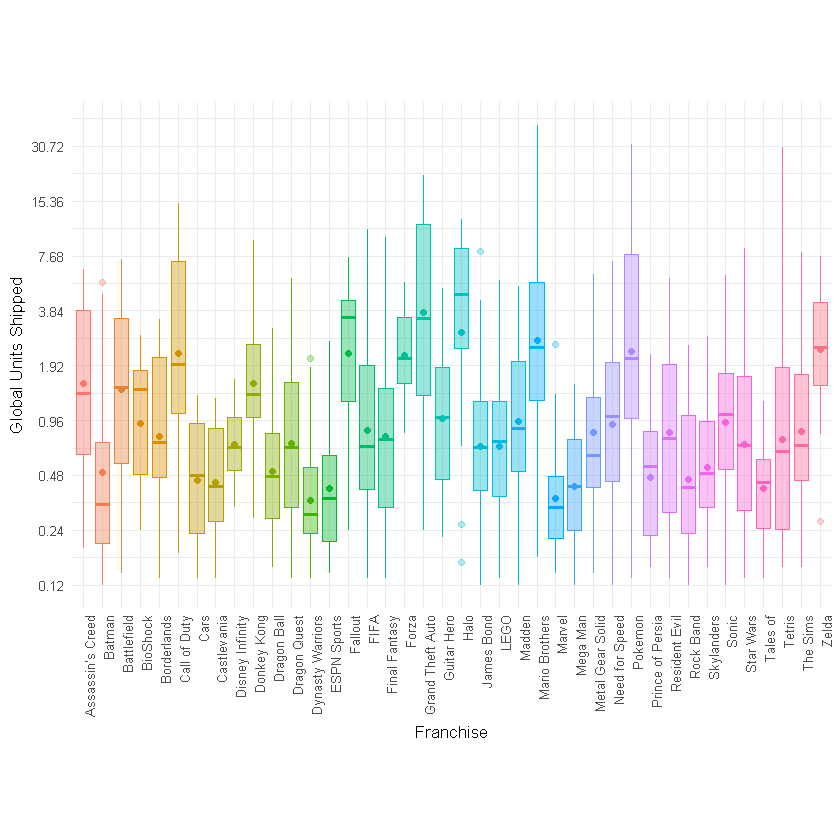

In [322]:
#describe.by(units, group = vgdata$Franchise)
describe(vgdata$Franchise)

bp4 = ggplot(subset(vgdata, Franchise != 'Other'), 
             aes(x = Franchise, 
                 y = Global_Sales,
                 color = Franchise)) +
      geom_boxplot(outlier.color = NULL,
                   outlier.alpha = .3,
                   aes(fill = Franchise),
                   alpha = .4) +
      geom_point(stat = 'summary', 
                aes(group = 1, 
                    col = Franchise), 
                fun.y = mean) + 
      theme(axis.text.x = element_text(angle = 90, hjust = 1),
           aspect.ratio = 2/3,
           legend.position = 'none') +
      labs(x = 'Franchise',
          y = 'Global Units Shipped') +
      scale_y_log10(breaks = c(.12, .24, .48, .96, 1.92, 3.84, 7.68, 15.36, 30.72, 61.44, 122.88))
                                        
bp4

It's interesting to see the breakdown of sales globally for some of the most popular franchises in the world. It will be a good idea to explore this further regionally with multivariate exploration. When it comes to Halo, it may not have as many sales as other franchises, but it has far less variation in how well the games ship. This means, you can generally expect a game in the Halo franchise to be a success.

Another thing to take into consideration here is that some titles have downloadable content (DLC) that has made it to the charts. You see this in franchises like Halo and Fallout, so where it appears a game may not have done as well as others in a franchise, it could just be DLC... and if it's DLC, it's actually done really well to be on the chart at all.

In [96]:
Summary.Publisher = na.omit(vgdata) %>%
                  group_by(Publisher) %>%
                  summarise(NA.Sum = sum(NA_Sales),
                            NA.Mean = mean(NA_Sales),
                            NA.Median = median(NA_Sales),
                            NA.Quant.90 = quantile(NA_Sales, probs = .9),
                            NA.Quant.10 = quantile(NA_Sales, probs = .1),
                            EU.Sum = sum(EU_Sales),
                            EU.Mean = mean(EU_Sales),
                            EU.Median = median(EU_Sales),
                            EU.Quant.90 = quantile(EU_Sales, probs = .9),
                            EU.Quant.10 = quantile(EU_Sales, probs = .1),
                            JP.Sum = sum(JP_Sales),
                            JP.Mean = mean(JP_Sales),
                            JP.Median = median(JP_Sales),
                            JP.Quant.90 = quantile(JP_Sales, probs = .9),
                            JP.Quant.10 = quantile(JP_Sales, probs = .1),
                            Other.Sum = sum(Other_Sales),
                            Other.Mean = mean(Other_Sales),
                            Other.Median = median(Other_Sales),
                            Other.Quant.90 = quantile(Other_Sales, probs = .9),
                            Other.Quant.10 = quantile(Other_Sales, probs = .1),
                            Global.Sum = sum(Global_Sales),
                            Global.Mean = mean(Global_Sales),
                            Global.Median = median(Global_Sales),
                            Global.Quant.90 = quantile(Global_Sales, probs = .9),
                            Global.Quant.10 = quantile(Global_Sales, probs = .1),
                            Count = n()) %>%
              arrange(Global.Sum)

#Publishers shipping more than 100 titles
Summary.Publisher.Count <- Summary.Publisher %>% 
                           filter(Count > 100)

#Publishers shipping more units than 95% of other publishers
Summary.Publisher.Units <-  Summary.Publisher %>%
                            filter(Global.Sum > quantile(Global.Sum, probs = .95))


head(Summary.Publisher.Count)
#str(Summary.Publisher.Count)

head(Summary.Publisher.Units)
#str(Summary.Publisher.Units)


Publisher,NA.Sum,NA.Mean,NA.Median,NA.Quant.90,NA.Quant.10,EU.Sum,EU.Mean,EU.Median,EU.Quant.90,...,Other.Mean,Other.Median,Other.Quant.90,Other.Quant.10,Global.Sum,Global.Mean,Global.Median,Global.Quant.90,Global.Quant.10,Count
Tecmo Koei,11.99,0.08751825,0.06,0.184,0.00,6.00,0.04379562,0.03,0.110,...,0.02087591,0.02,0.04,0.00,44.20,0.3226277,0.24,0.614,0.130,137
Vivendi Games,34.10,0.32476190,0.18,0.672,0.10,14.60,0.13904762,0.05,0.236,...,0.04276190,0.02,0.08,0.00,53.43,0.5088571,0.31,1.032,0.140,105
Acclaim Entertainment,40.21,0.32168000,0.18,0.906,0.08,15.70,0.12560000,0.07,0.290,...,0.02584000,0.01,0.06,0.00,60.10,0.4808000,0.27,1.090,0.140,125
Midway Games,42.09,0.31646617,0.20,0.658,0.10,17.18,0.12917293,0.07,0.304,...,0.04135338,0.02,0.10,0.00,65.00,0.4887218,0.30,1.076,0.152,133
Eidos Interactive,45.12,0.38564103,0.20,0.930,0.07,33.32,0.28478632,0.13,0.938,...,0.06452991,0.03,0.13,0.01,92.04,0.7866667,0.39,1.762,0.150,117
Disney Interactive Studios,69.28,0.37448649,0.27,0.754,0.11,32.77,0.17713514,0.12,0.400,...,0.07005405,0.04,0.15,0.01,115.54,0.6245405,0.46,1.414,0.170,185


Publisher,NA.Sum,NA.Mean,NA.Median,NA.Quant.90,NA.Quant.10,EU.Sum,EU.Mean,EU.Median,EU.Quant.90,...,Other.Mean,Other.Median,Other.Quant.90,Other.Quant.10,Global.Sum,Global.Mean,Global.Median,Global.Quant.90,Global.Quant.10,Count
Eidos Interactive,45.12,0.3856410,0.200,0.930,0.070,33.32,0.2847863,0.130,0.938,...,0.06452991,0.03,0.130,0.01,92.04,0.7866667,0.390,1.762,0.15,117
Disney Interactive Studios,69.28,0.3744865,0.270,0.754,0.110,32.77,0.1771351,0.120,0.400,...,0.07005405,0.04,0.150,0.01,115.54,0.6245405,0.460,1.414,0.17,185
Atari,95.94,0.4400917,0.225,1.016,0.087,24.27,0.1113303,0.060,0.273,...,0.03821101,0.02,0.080,0.00,139.27,0.6388532,0.380,1.306,0.14,218
Warner Bros. Interactive Entertainment,76.04,0.4066310,0.250,1.024,0.070,48.95,0.2617647,0.160,0.542,...,0.09267380,0.05,0.194,0.02,143.53,0.7675401,0.450,1.652,0.17,187
Square Enix,51.93,0.2762234,0.170,0.616,0.000,35.39,0.1882447,0.095,0.496,...,0.07941489,0.04,0.173,0.00,152.69,0.8121809,0.505,1.753,0.16,188
Capcom,76.37,0.3129918,0.170,0.778,0.000,38.19,0.1565164,0.080,0.440,...,0.05942623,0.03,0.140,0.00,195.93,0.8029918,0.415,1.890,0.15,244


When we compare top publishers (those that have published more than 100 games) by units shipped, we see a different story than we did breaking publishers down only by title count. Now we can see that Nintendo hops into the first spot for number of units shipped globally, while Electronic Arts falls to second place. I was curious if getting the list of top publishers from the top 5% of Publishers by units shipped would make a difference to what is considered the list of "top publishers". There are only 17 Publishers in the top 95% by units, whereas there are 21 in the top by titles. Aside from that, the list of the top 5% by units have all shipped 100 titles or more.

vgdata$Publisher 
       n  missing distinct 
   10000        0      338 

lowest : 20th Century Fox Video Games 3DO                          505 Games                    989 Sports                   989 Studios                 
highest: Xseed Games                  Yacht Club Games             Zoo Digital Publishing       Zoo Games                    Zushi Games                 

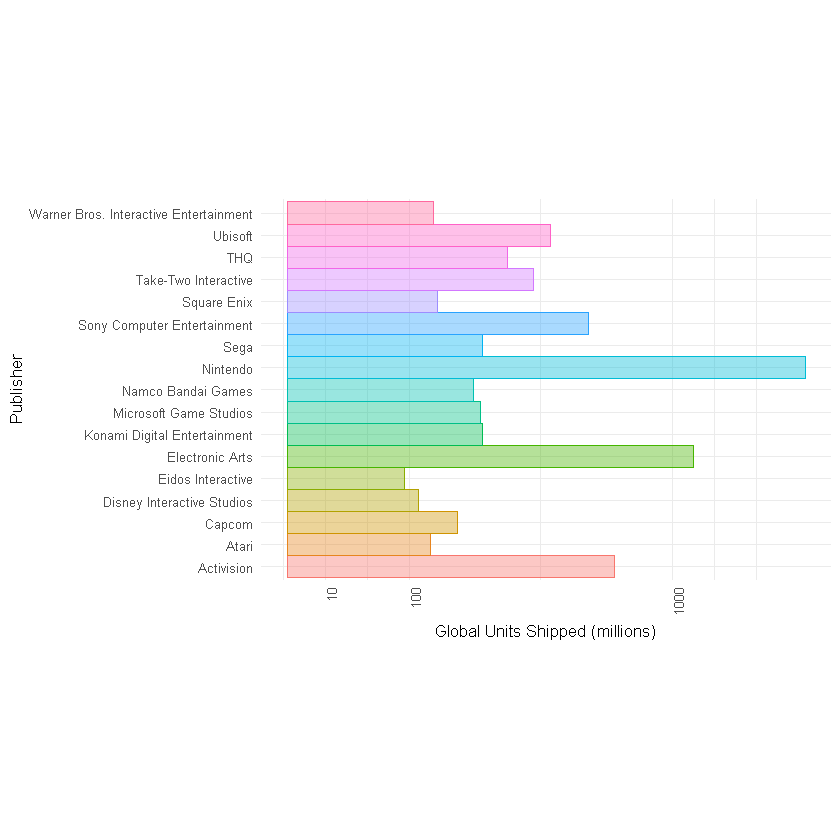

In [103]:

#describe.by(units, group = vgdata$Publisher)
describe(vgdata$Publisher)

b7 = ggplot(Summary.Publisher.Units, aes(x = Publisher, 
                         y = Global.Sum,
                         color = Publisher)) +
      geom_bar(stat = 'identity',
               width = 1,
               aes(fill = Publisher),
                   alpha = .4) +
      theme(axis.text.x = element_text(angle = 90, hjust = 1),
            aspect.ratio = 2/3,
            legend.position = 'none') +
      labs(x = 'Publisher',
           y = 'Global Units Shipped (millions)') +
      scale_y_sqrt(breaks = 10^seq(1, 3)) +
      coord_flip()
b7


Nintendo is still on top when it comes to global units shipped. Their large amount of games published seems to translate into large amounts of those units shipped. I suspect that this is partially due to the global appeal of Nintendo. Following that, there aren't any surprises seeing Electronic Arts or Activision so successful.

In [100]:
Summary.Platform = na.omit(vgdata) %>%
                  group_by(Platform) %>%
                  summarise(NA.Sum = sum(NA_Sales),
                            NA.Mean = mean(NA_Sales),
                            NA.Median = median(NA_Sales),
                            NA.Quant.90 = quantile(NA_Sales, probs = .9),
                            NA.Quant.10 = quantile(NA_Sales, probs = .1),
                            EU.Sum = sum(EU_Sales),
                            EU.Mean = mean(EU_Sales),
                            EU.Median = median(EU_Sales),
                            EU.Quant.90 = quantile(EU_Sales, probs = .9),
                            EU.Quant.10 = quantile(EU_Sales, probs = .1),
                            JP.Sum = sum(JP_Sales),
                            JP.Mean = mean(JP_Sales),
                            JP.Median = median(JP_Sales),
                            JP.Quant.90 = quantile(JP_Sales, probs = .9),
                            JP.Quant.10 = quantile(JP_Sales, probs = .1),
                            Other.Sum = sum(Other_Sales),
                            Other.Mean = mean(Other_Sales),
                            Other.Median = median(Other_Sales),
                            Other.Quant.90 = quantile(Other_Sales, probs = .9),
                            Other.Quant.10 = quantile(Other_Sales, probs = .1),
                            Global.Sum = sum(Global_Sales),
                            Global.Mean = mean(Global_Sales),
                            Global.Median = median(Global_Sales),
                            Global.Quant.90 = quantile(Global_Sales, probs = .9),
                            Global.Quant.10 = quantile(Global_Sales, probs = .1),
                            Count = n()) %>%
              mutate(Percent = Count/sum(Count)) %>%
              arrange(Platform)

#Summary.Platform

vgdata$Platform 
       n  missing distinct 
   10000        0       29 

lowest : 2600 3DS  DC   DS   GB  , highest: WiiU WS   X360 XB   XOne

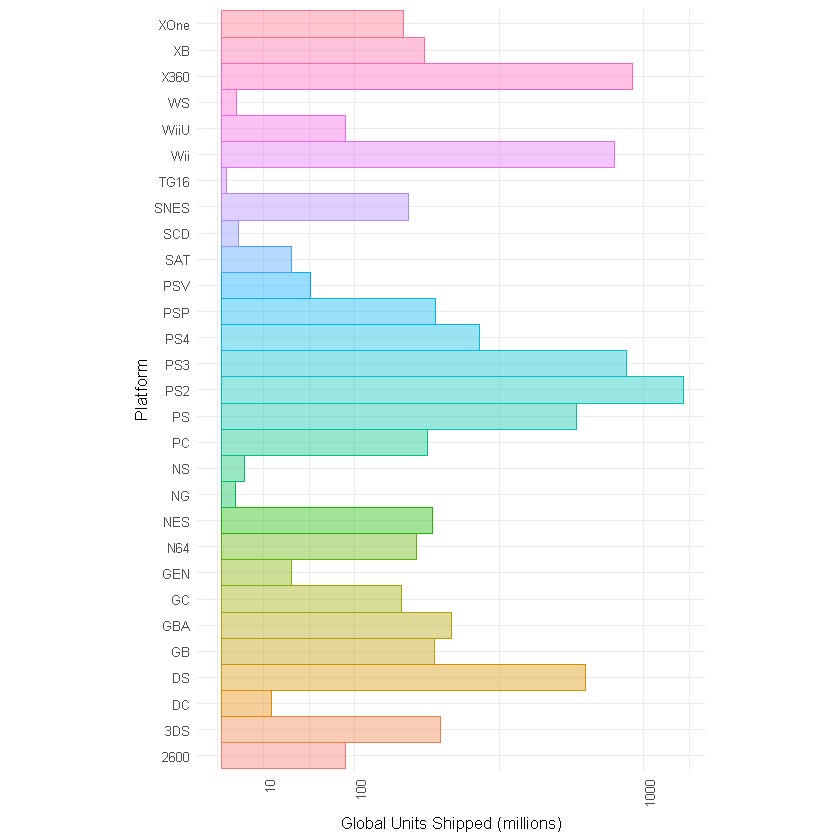

In [102]:
#describe.by(units, group = vgdata$Platform)
describe(vgdata$Platform)

b8 = ggplot(Summary.Platform, aes(x = Platform, 
                         y = Global.Sum,
                         color = Platform)) +
      geom_bar(stat = 'identity',
               width = 1,
               aes(fill = Platform),
               alpha = .4) +
      theme(axis.text.x = element_text(angle = 90, hjust = 1),
            aspect.ratio = 3/2,
            legend.position = 'none') +
      labs(x = 'Platform',
           y = 'Global Units Shipped (millions)') +
      scale_y_sqrt(breaks = 10^seq(1, 3)) +
      coord_flip()

b8

When we look at platform by units shipped, there's some irregular patterns that appear. This is mostly due to alphabetical ordering of the platform names. One thing that is interesting to see is NS (Nintendo Switch) is so low - that's likely more due to the fact it was very recently released, and not that it isn't gaining steam.

The TG16 was largely a flop, so it's surprising to see it even represented, though in the boxplot timeline that was created earlier, it seems it didn't really stick around on the market long.

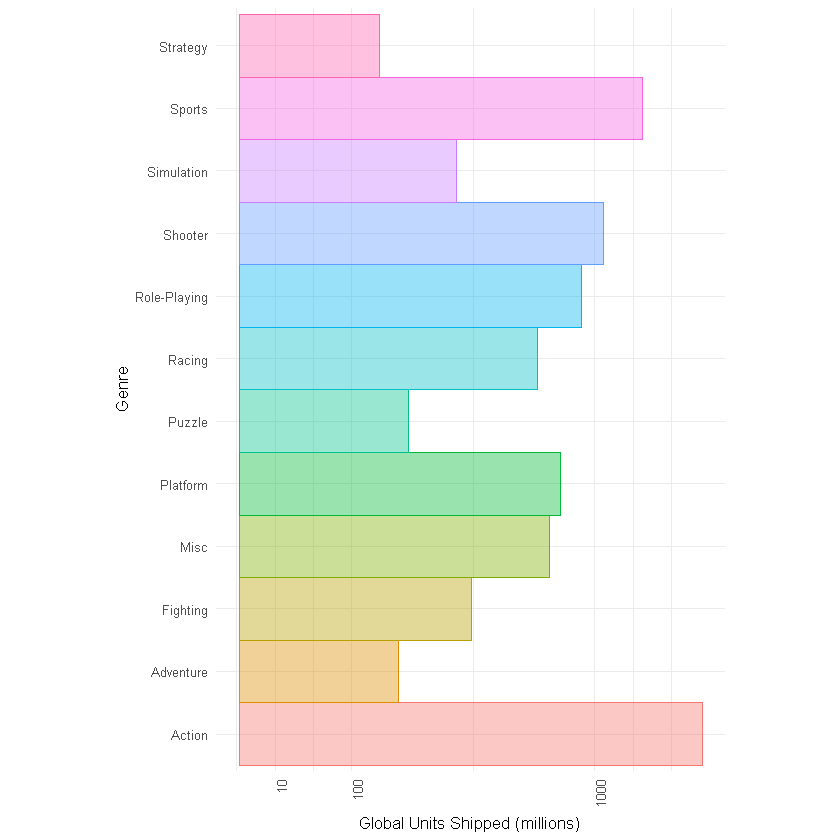

In [107]:
b10 = ggplot(Summary.Genre, aes(x = Genre, 
                         y = Global.Sum,
                         color = Genre)) +
      geom_bar(stat = 'identity',
               width = 1,
               aes(fill = Genre),
                   alpha = .4) +
      theme(axis.text.x = element_text(angle = 90, hjust = 1),
            aspect.ratio = 3 / 2,
            legend.position = 'none') +
      labs(x = 'Genre',
           y = 'Global Units Shipped (millions)') +
      scale_y_sqrt(breaks = 10^seq(1, 3)) +
      coord_flip()
b10

We see a very similar story when looking at genres by units shipped as we did when we looked at genres by count. Action has a wide lead, followed by Sports, and then Shooters. It's interesting to see Puzzle games aren't in last place anymore, but instead strategy, which is one of my favorite genres.

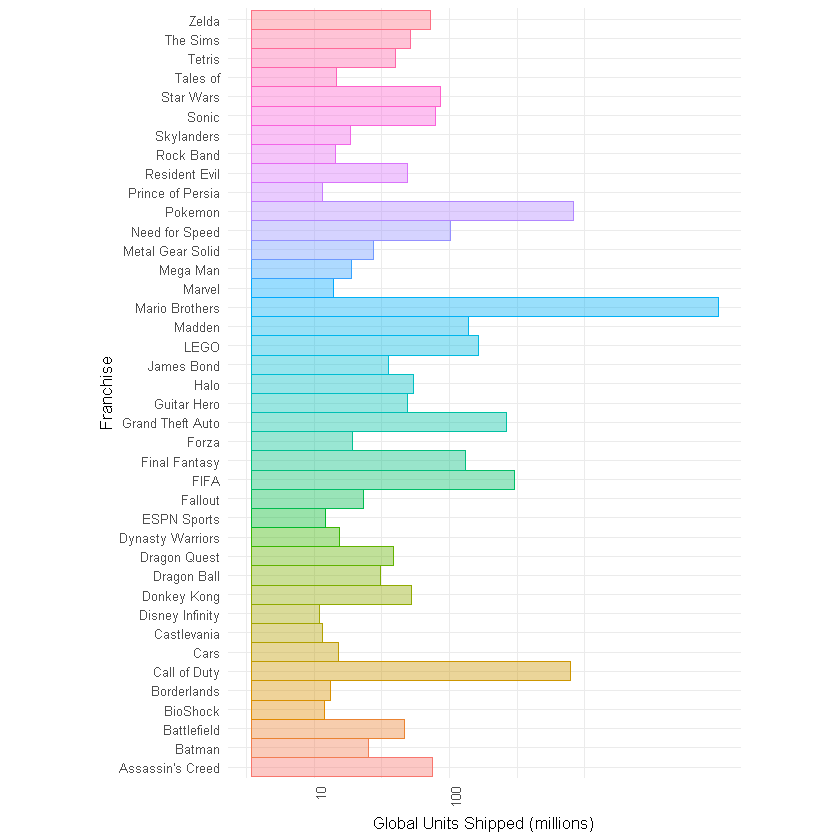

In [110]:
b9 = ggplot(Summary.Franchise, aes(x = Franchise, 
                         y = Global.Sum,
                         color = Franchise)) +
      geom_bar(stat = 'identity',
               width = 1,
               aes(fill = Franchise),
                   alpha = .4) +
      theme(axis.text.x = element_text(angle = 90, hjust = 1),
            aspect.ratio = 3/2,
            legend.position = 'none') +
      labs(x = 'Franchise',
           y = 'Global Units Shipped (millions)') +
      scale_y_sqrt(breaks = 10 ^ seq(1, 3)) +
      coord_flip()
b9

It's no surprise to see that games in the Mario Brothers franchise have sold so many copies. There's over 100 games across platforms in the franchise, and many have been wildly popular. Seeing as Nintendo was one of the big console makers in the 80s, drilling into the Mario Brothers games might reveal one of the big peaks in unit sales for 1985 or 1989.

In [36]:
mario <- subset(vgdata, Franchise == 'Mario Brothers')
mario

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Decade,Franchise,Console_Company
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,80s,Mario Brothers,Nintendo
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.69,12.84,3.80,3.29,35.62,00s,Mario Brothers,Nintendo
7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.15,6.50,2.88,29.81,00s,Mario Brothers,Nintendo
9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.50,6.95,4.70,2.25,28.40,00s,Mario Brothers,Nintendo
12,Mario Kart DS,DS,2005,Racing,Nintendo,9.71,7.48,4.13,1.90,23.23,00s,Mario Brothers,Nintendo
19,Super Mario World,SNES,1990,Platform,Nintendo,12.78,3.75,3.54,0.55,20.61,90s,Mario Brothers,Nintendo
22,Super Mario Land,GB,1989,Platform,Nintendo,10.83,2.71,4.18,0.42,18.14,80s,Mario Brothers,Nintendo
23,Super Mario Bros. 3,NES,1988,Platform,Nintendo,9.54,3.44,3.84,0.46,17.28,80s,Mario Brothers,Nintendo
39,Mario Kart 7,3DS,2011,Racing,Nintendo,5.39,4.38,2.79,0.97,13.53,10s,Mario Brothers,Nintendo
48,Super Mario 64,N64,1996,Platform,Nintendo,6.91,2.85,1.91,0.23,11.89,90s,Mario Brothers,Nintendo


The legendary game, Super Mario Bros. was released in 1989 and has shipped over 40 million units worldwide. That goes to show just how many people grew up playing that iconic game in the 90s. Perhaps it could even be correlated with the continued popularity of Nintendo (and Mario Brothers) to this day.

My favorite franchise is Fallout, and while this isn't one of the top franchises statistically, I'm interested in exploring the summary for that as well.

In [37]:
fallout <- subset(vgdata, Franchise == 'Fallout')
fallout


#halo <- subset(vgdata, Franchise == 'Halo')
#halo

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Decade,Franchise,Console_Company
99,Fallout 4,PS4,2015,Role-Playing,Bethesda Softworks,2.64,3.50,0.25,1.20,7.59,10s,Fallout,Sony
217,Fallout 3,X360,2008,Role-Playing,Bethesda Softworks,3.41,0.99,0.09,0.45,4.94,00s,Fallout,Microsoft
252,Fallout 4,XOne,2015,Role-Playing,Bethesda Softworks,2.69,1.38,0.02,0.41,4.49,10s,Fallout,Microsoft
301,Fallout: New Vegas,X360,2010,Role-Playing,Bethesda Softworks,2.66,1.03,0.04,0.33,4.06,10s,Fallout,Microsoft
313,Fallout 3,PS3,2008,Role-Playing,Bethesda Softworks,2.16,1.13,0.07,0.59,3.96,00s,Fallout,Sony
450,Fallout: New Vegas,PS3,2010,Role-Playing,Bethesda Softworks,1.53,1.03,0.10,0.46,3.13,10s,Fallout,Sony
1403,Fallout 4,PC,2015,Role-Playing,Bethesda Softworks,0.55,0.75,0.00,0.11,1.40,10s,Fallout,PC
1745,Fallout: New Vegas,PC,2010,Role-Playing,Bethesda Softworks,0.59,0.45,0.00,0.14,1.17,10s,Fallout,PC
2140,Fallout 3,PC,2008,Role-Playing,Bethesda Softworks,0.02,0.88,0.00,0.08,0.98,00s,Fallout,PC
7025,Fallout 3 Game Add-On Pack: Broken Steel and Point Lookout,X360,2009,Role-Playing,Bethesda Softworks,0.16,0.06,0.00,0.02,0.24,00s,Fallout,Microsoft


Fallout is a cross-platform success, and it's now a little more apparent that cross platform launches can flub things up when trying to get an idea of how well a game has done overall, so this data might be better grouped by Name.

In [38]:
Fallout.Name.Group = na.omit(subset(vgdata, Franchise == 'Fallout')) %>%
                  group_by(Name) %>%
                  summarise(Global.Sum = sum(Global_Sales),
                            Global.Mean = mean(Global_Sales),
                            Global.Median = median(Global_Sales),
                            Global.Quant.90 = quantile(Global_Sales, probs = .9),
                            Global.Quant.10 = quantile(Global_Sales, probs = .1),
                            Count = n()) %>%
              arrange(Global.Sum)

Fallout.Name.Group

Name,Global.Sum,Global.Mean,Global.Median,Global.Quant.90,Global.Quant.10,Count
Fallout 3 Game Add-On Pack: Broken Steel and Point Lookout,0.24,0.240000,0.24,0.240,0.240,1
Fallout: New Vegas,8.36,2.786667,3.13,3.874,1.562,3
Fallout 3,9.88,3.293333,3.96,4.744,1.576,3
Fallout 4,13.48,4.493333,4.49,6.970,2.018,3


There's a lot of observations to be made from the box and bar charts, as well as the summary tables. In general, we can observe a lot of the same trends that we saw when looking at single variables. Games that had a larger number of titles tend to do well overall, and the same goes for publishers with a large number of titles produced. We can see similar trends when we look at games decade over decade (at least the full decades), that there was a boom in the 80s where relatively few games shipped a whole lot of copies. This has since leveled off, and continues to as the video game market has become saturated.

This section focused mostly on global unit numbers, since it will be good to see some of the regional breakdowns using multivariate plots.

In [43]:
Top.Selling.Games <- subset(vgdata, Global.Units >= quantile(Global.Units, probs = .9))
Top.Selling.Games

Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Decade,Franchise,Console_Company
Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,00s,Other,Nintendo
Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,80s,Mario Brothers,Nintendo
Mario Kart Wii,Wii,2008,Racing,Nintendo,15.69,12.84,3.80,3.29,35.62,00s,Mario Brothers,Nintendo
Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.94,3.29,2.95,32.79,00s,Other,Nintendo
Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,90s,Pokemon,Nintendo
Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,80s,Tetris,Nintendo
New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.15,6.50,2.88,29.81,00s,Mario Brothers,Nintendo
Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,00s,Other,Nintendo
New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.50,6.95,4.70,2.25,28.40,00s,Mario Brothers,Nintendo
Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,80s,Other,Nintendo


If we take a look at games that have shipped in the 90th quantile globally, we can see the top game ever. In the top spot is *Wii Sports*, with over 82 million units shipped. This is an interesting data point, because Wii Sports came free with the purchase of a Wii console. This is an example where we can see a free game having inflated numbers because it was given away. That said, it was still an extremely popular game for people to play, so it's still an important achievement.

In [195]:
#Top.Pubs <- data.frame(table(Top.Selling.Games$Publisher))

Top.Pubs <- data.frame(Top.Selling.Games$Publisher)
colnames(Top.Pubs)[colnames(Top.Pubs)=='Var1'] <- 'Publisher'

Percent.Publisher <- prop.table(table(Top.Pubs))
Top.Pubs <- data.frame(Percent.Publisher)
colnames(Top.Pubs)[colnames(Top.Pubs)=='Freq'] <- 'Percent'
Top.Pubs <- subset(Top.Pubs, Percent > 0)
Top.Pubs <- arrange(Top.Pubs, desc(Percent))
head(Top.Pubs)

ERROR: Error in data.frame(Top.Selling.Games$Publisher): object 'Top.Selling.Games' not found


With Nintendo and EA coming up again and again as a leader in titles shipped, I wanted to break the top publishers out by % of games published. This really puts into perspective just how much of a giant Nintendo is in the industry, not only making countless consoles, but also publishing over 22% of games on this list, with many titles that attain success globally. The next highest is Electronic Arts, with just over 15%. Seeing as the popularity of EA Sports games has come through loud and clear in this analysis, this isn't surprising. Just like with platforms, depending on how you slice the data with give you a different answer on who is 'better'.

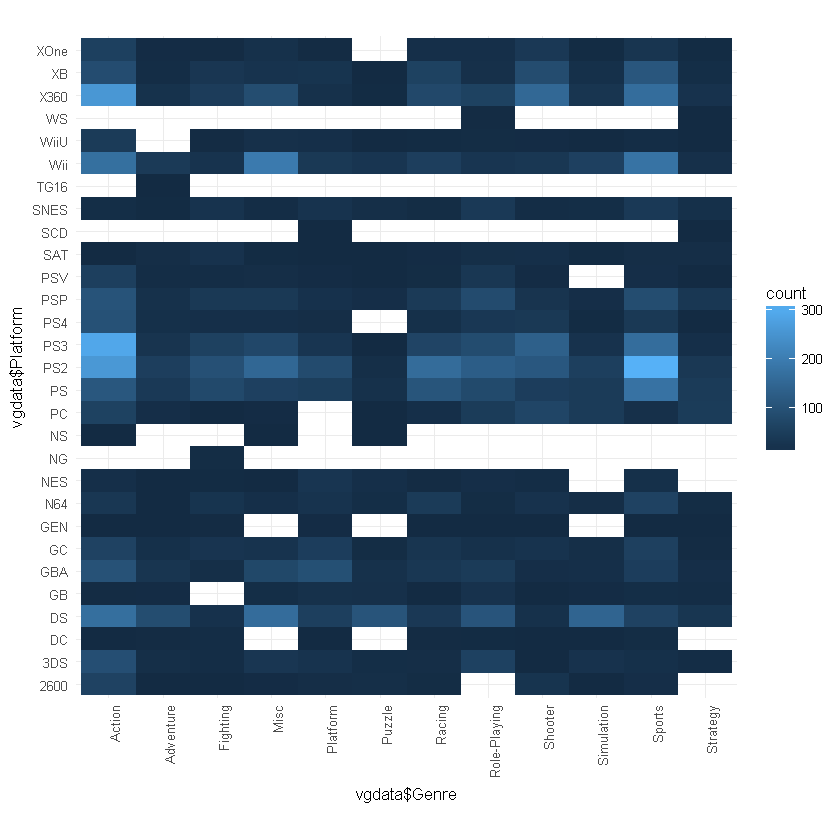

In [186]:
bin1 <- ggplot(vgdata, aes(vgdata$Genre, vgdata$Platform)) +
        theme(axis.text.x = element_text(angle = 90, hjust = 1),
           aspect.ratio = 1) +
        geom_bin2d()

bin1

I wasn't sure how to compare these categorical variables properly at first, so with the suggestion to look into geom_bin2d, the above plot and the next one were made. We can see that the largest number of sports games have been made for PS2, and the largest number of action games for the PS3, followed by the PS2. Combined with the popularity of these types of games, this could certainly be used as an argument that Sony is winning the console wars.

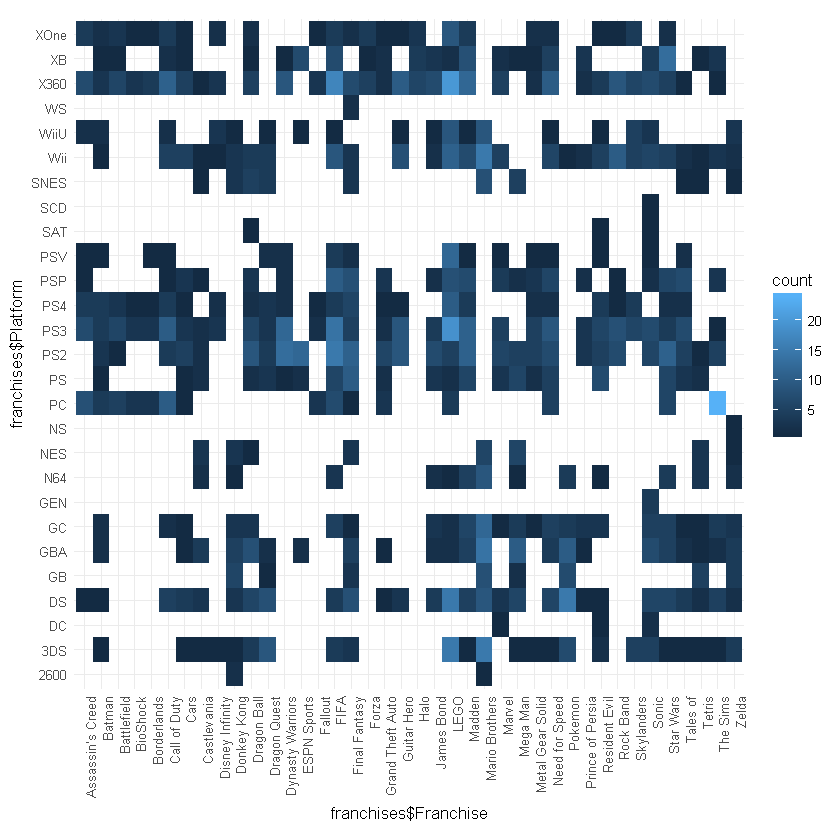

In [193]:
franchises <- subset(vgdata, vgdata$Franchise != 'Other')

bin2 <- ggplot(franchises, 
               aes(franchises$Franchise, franchises$Platform)) +
        theme(axis.text.x = element_text(angle = 90, hjust = 1),
           aspect.ratio = 1) +
        geom_bin2d()

bin2

There's more interesting insights when looking at this plot showing count of franchises on platforms. It's clear The Sims have predominantly been PC games, whereas many other franchises haven't been published on the PC at all. The Sega Genesis was really only super famous for the Sonic games, and that is reflected here as well.


# Bivariate Analysis



### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

To do this part of the analysis, I needed to reahape and summarize data in order to get a better understanding of the big picture. In general, if a publisher has released a lot of titles, then they usually have released a lot of copies of many of those titles.

Regionally, NA seems to drive the bulk of the volume, as success in units shipped in NA is extremely positively correlated with Global units. The same goes for the EU. Additionally, as the years go onward there is a trend downward from the 80's onward in number of units shipped per title, however it's mostly leveled out over the last decade.

When we compare top publishers (those that have published more than 100 games) by units shipped, we see a different story than we did breaking publishers down only by title count. Now we can see that Nintendo hops into the first spot for number of units shipped globally, while Electronic Arts falls to second place. I was curious if getting the list of top publishers from the top 5% of Publishers by units shipped would make a difference to what is considered the list of "top publishers". There are only 17 Publishers in the top 95% by units, whereas there are 21 in the top by titles. Aside from that, the list of the top 5% by units have all shipped 100 titles or more.

For the JP region, seeing the lower correlations was interesting, but it seems to coincide with the notorious reputation Japan has for being very loyal to games made by companies in Japan. Games popular in North America are generally not super successful there, and the scatterplot revealed a lot of games don't sell well enough to be denoted in the millions with two decimal places.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

When it comes to game franchises, there is a huge amount in variance in the amount of success a game might achieve. This makes a lot of sense, as some games do better than others, and some have been met with extremely poor sales even if they carry name recongition. Other observations were unsurprising, such as games that release on a lot of consoles being part of popular franchises, and having relatively successful sales. Drilling down into the Mario franchise revealed the source of some of the peaks in 1985 and 1989, which was no surprise considering how ubiquitous Super Mario Bros and Super Mario Land are.

Looking at a boxplot broken down by platform gives a really cool view into some information about the successes of each platform. Faceting these plots by decades gives us a timeline of when different consoles were most popular, and for the 80s, 90s, 00s, and 10s you can see the generational changeovers for electronics as certain consoles were phased out and others were phased in. Unfortunately, any games that didn't have a year land in the NA bin..

### What was the strongest relationship you found?
The strongest relationship that could be numerically measured was NA.Units with Global.Units with a .94 Pearson correlation, followed by EU.Units and Global.Units with a .9 Pearson correlation. The correlation between NA.Units and EU.Units was still extremely strong at .75.


# Multivariate Plots Section

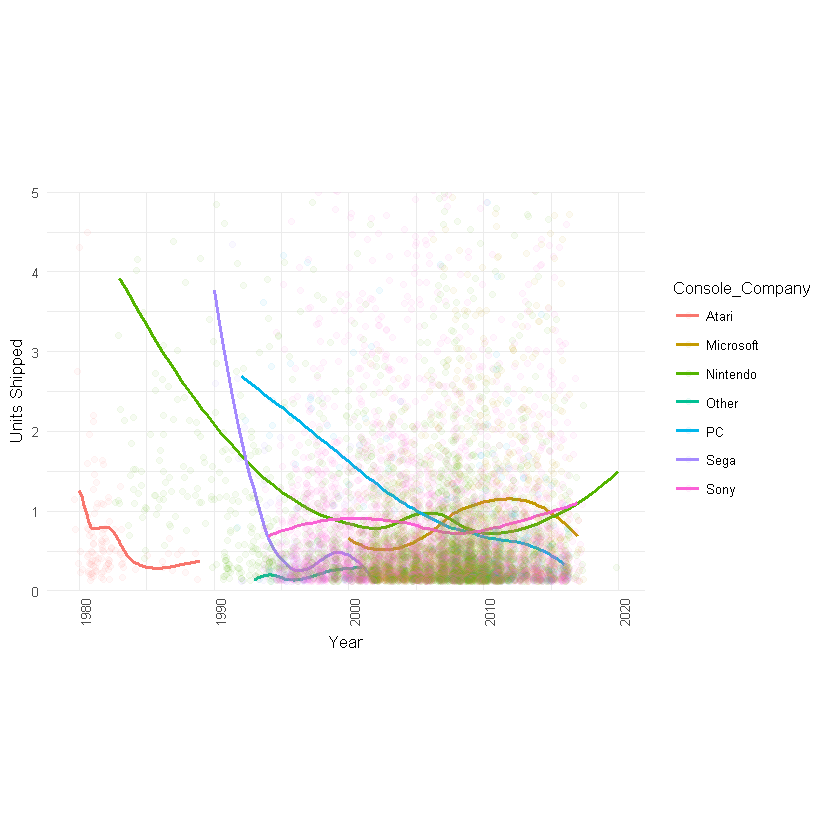

In [66]:
oldw <- getOption("warn")
options(warn = -1)

s1 = ggplot(vgdata, 
             aes(x = Year, 
                 y = Global_Sales,
                 color = Console_Company)) +
      geom_smooth(stat = 'smooth', 
                  method = 'loess',
                  se = F,
                  aes(col = Console_Company)) + 
      geom_point(aes(col = Console_Company),
                 alpha = .05,
                 position = 'jitter') +
      theme(axis.text.x = element_text(angle = 90, hjust = 1),
           aspect.ratio = 2/3) +
      labs(x = 'Year',
          y = 'Units Shipped') +
      coord_trans(limy = c(0, 5))
                                        
s1

Looking at average units shipped globally by Console_Company reveals some really interesting chunks of data about the history of console makers. In 1992, PC gaming burst onto the scene with a passionate fan base that continued to drive up average sales per title into the mid-90s when the console wars really took off. 

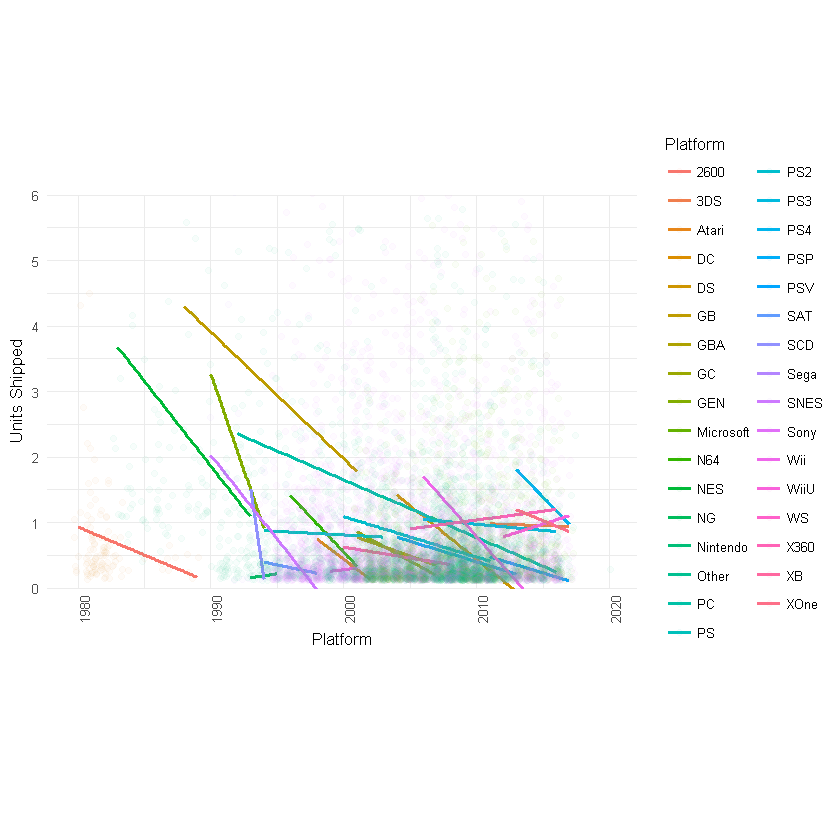

In [94]:
s2 = ggplot(vgdata, 
            aes(x = Year, 
                y = Global_Sales,
                color = Platform)) +
      geom_smooth(stat = 'smooth', 
                  method = 'gam',
                  se = F,
                  aes(col = Platform)) + 
      geom_point(aes(col = Console_Company),
                 alpha = .03,
                 position = 'jitter') +
      theme(axis.text.x = element_text(angle = 90, hjust = 1),
           aspect.ratio = 2/3) +
      labs(x = 'Platform',
          y = 'Units Shipped') +
      coord_trans(limy = c(0, 6))

s2


#+
#      facet_wrap(~factor(Decade,  
#                         levels = c("80s", "90s", "00s", "10s")), 
#                 scales = 'free',
#                 nrow = 2,
#                 ncol = 2)

options(warn = oldw)

This plot split by platform is included because it really illustrates how much competition there was between consoles starting late 90s, which is what earned it the title of *the Console Wars*. That said, competition is still alive and well between the big three companies currently in the market, as well as PCs.  

On average, the number of units shipped for each title on almost every console has continued to steadily decline over the years. This could be partially due to the sheer number of systems available compared to what there used to be. Perhaps it could be due to other factors not included in this dataset, such as rising costs to purchase games, or markets shifts towards subscription based, free-to-play, and pay-to-win games.

Seeing the overall decline in average number of units shipped per title begs several additional questions. Was there a video game bubble, and has it burst? Not only have average units shipped been decreasing in the last decade, as the first histogram shows, the number of games made each year has been decreasing. Or perhaps this is still a relatively young industry, and something more is going on here. As time goes forward, it's within reason to believe we could see further peaks and valleys in the trends of game sale based on the climate of the market in each region, especially seeing Sony as a whole has been steadily increasing their average units shipped over the last few years.

In [45]:
oldw <- getOption("warn")
options(warn = -1)

melt.sales <- data.frame(NA.Units, 
                         EU.Units,
                         JP.Units, 
                         Other.Units,
                         Global.Units,
                         as.factor(vgdata$Year),
                         as.factor(vgdata$Franchise),
                         as.factor(vgdata$Genre),
                         as.factor(vgdata$Decade),
                         as.factor(vgdata$Console_Company),
                         as.factor(vgdata$Platform),
                         id.vars = vgdata$Name)


melt.sales <- melt(melt.sales)
colnames(melt.sales)[colnames(melt.sales)=='id.vars'] <- 'Name'
colnames(melt.sales)[colnames(melt.sales)=='variable'] <- 'Region'
colnames(melt.sales)[colnames(melt.sales)=='value'] <- 'Units'
colnames(melt.sales)[colnames(melt.sales)=='as.factor.vgdata.Year.'] <- 'Year'
colnames(melt.sales)[colnames(melt.sales)=='as.factor.vgdata.Franchise.'] <- 'FranchiseYear'
colnames(melt.sales)[colnames(melt.sales)=='as.factor.vgdata.Genre.'] <- 'Genre'
colnames(melt.sales)[colnames(melt.sales)=='as.factor.vgdata.Decade.'] <- 'Decade'
colnames(melt.sales)[colnames(melt.sales)=='as.factor.vgdata.Console_Company.'] <- 'Console_Company'
colnames(melt.sales)[colnames(melt.sales)=='as.factor.vgdata.Platform.'] <- 'Platform'
melt.sales$Year <- as.numeric(as.character(melt.sales$Year))
melt.sales <- data.frame(melt.sales)

total.sales <- melt.sales %>%
                   group_by(Region, Year) %>%
                   summarise(Total = sum(Units))

total.sales.year <- subset(total.sales, Region == 'Global.Units') %>%
                        group_by(Year, Region) %>%
                        summarise(Total.Units = sum(Total))

head(total.sales.year)
tail(total.sales.year)

options(warn = oldw)

Using as.factor.vgdata.Year., as.factor.vgdata.Franchise., as.factor.vgdata.Genre., as.factor.vgdata.Decade., as.factor.vgdata.Console_Company., as.factor.vgdata.Platform., id.vars as id variables


Year,Region,Total.Units
1980,Global.Units,11.38
1981,Global.Units,35.77
1982,Global.Units,28.86
1983,Global.Units,16.79
1984,Global.Units,50.36
1985,Global.Units,53.89


Year,Region,Total.Units
2014,Global.Units,333.95
2015,Global.Units,272.97
2016,Global.Units,201.57
2017,Global.Units,22.21
2020,Global.Units,0.29
NA,Global.Units,93.74


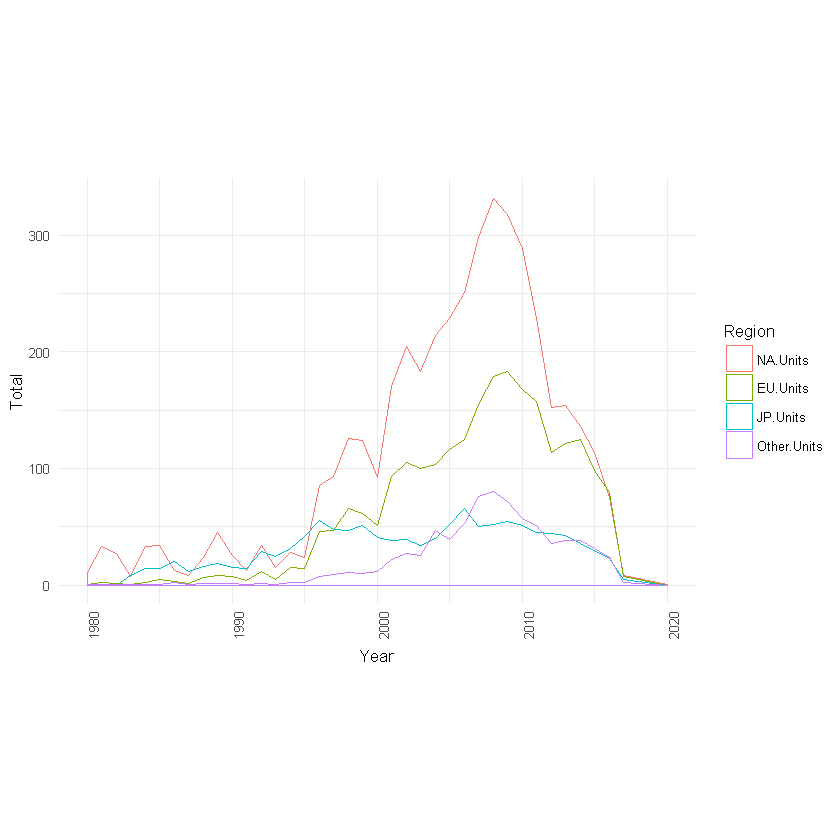

In [47]:
oldw <- getOption("warn")
options(warn = -1)

ap2 = ggplot(subset(total.sales, Region != 'Global.Units'),
             aes(x = Year,
                 y = Total,
                 col = Region,
                 group = Region)) +
      geom_density(stat = 'identity',
                   alpha = .4) +
      theme_set(theme_minimal(10)) +
      theme(axis.text.x = element_text(angle = 90, hjust = 1),
           aspect.ratio = 2/3) +
      scale_y_continuous()
      
ap2

options(warn = oldw)

When I first identified the dependent variable (Global Sales, which with 
a properly arranged dataset can be broken out by Region), this plot showing 
global yearly units shipped, colored by region, was what I initially 
envisioned to tell the story of video game sales globally. In order to 
create this plot, the dataset needed to be significantly reshaped using 
melt, and also needed the sales data summarized.

What's really fascinating to see here is the steep trend upwards from 2005, 
peaking in 2008 and 2009, before dropping off in a downward trend. This 
shows that when there are spikes in game sales, the ripple effects are felt 
across regions, and the same goes for dips. During the big spike, games shipped 
to the Other region edged out Japan, however in the time since, JP and Other 
are on fairly even playing field. Another surprise was seeing the time period
in the 90's where Japan sold the most units worldwide.

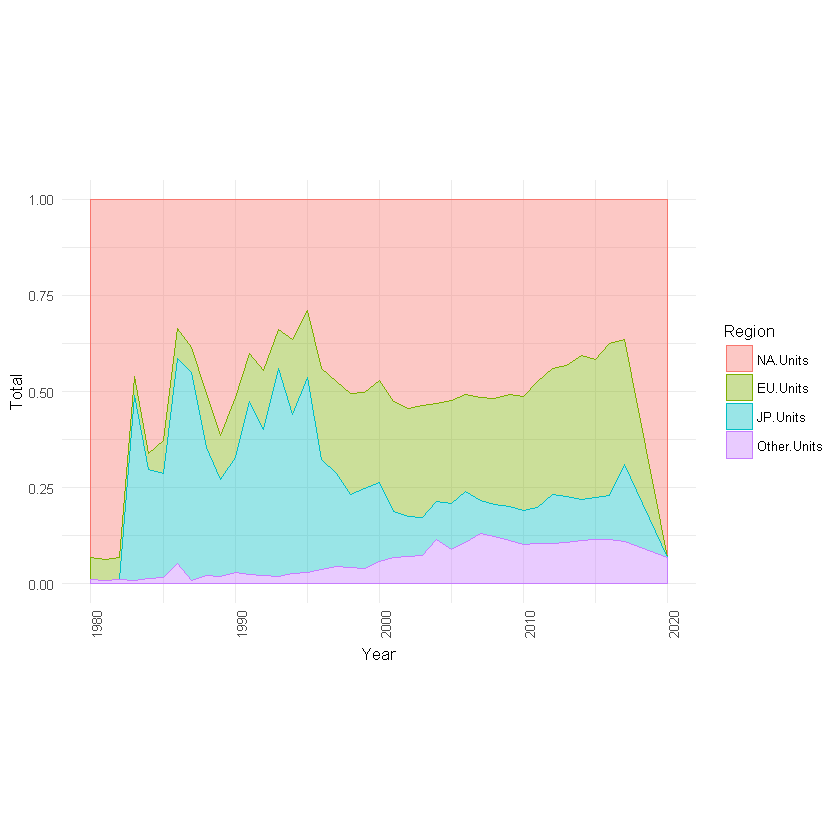

In [153]:
oldw <- getOption("warn")
options(warn = -1)

ap3 = ggplot(subset(total.sales, Region != 'Global.Units'),
             aes(x = Year,
                 y = Total,
                 col = Region,
                 fill = Region,
                 group = Region)) +
      geom_density(stat = 'identity',
                   alpha = .4,
                   position = 'fill') +
      theme_set(theme_minimal(10)) +
      theme(axis.text.x = element_text(angle = 90, hjust = 1),
           aspect.ratio = 2/3) +
      scale_y_continuous()
      
ap3

options(warn = oldw)

Since global units shipped is the sum of games shipped in each region, creating this plot showing each region as a proportion of the total gives a really good look at how much share each region held each year. It would seem that gaming hasn't necessarily gotten less popular in Japan over the years, just perhaps other regions have gained so much traction that Japan's share has decreased. This data set can't answer that for sure, but it's certainly something to speculate on.

In [84]:
Summary.Name = na.omit(vgdata) %>%
                  group_by(Name, Year) %>%
                  summarise(NA.Sum = sum(NA_Sales),
                            EU.Sum = sum(EU_Sales),
                            JP.Sum = sum(JP_Sales),
                            Other.Sum = sum(Other_Sales),
                            Global.Sum = sum(Global_Sales)) %>%
                  arrange(desc(Year), desc(Global.Sum))

print('Top Games: 1985')
head(filter(Summary.Name, Year == 1985))

print('Top Games: 1989')
head(filter(Summary.Name, Year == 1989))   

print('Top Games: 2008')
head(filter(Summary.Name, Year == 2008))

print('Top Games: 2009')
head(filter(Summary.Name, Year == 2009))   


Summary.Franchise.Top = na.omit(vgdata) %>%
                  group_by(Franchise, Year) %>%
                  summarise(NA.Sum = sum(NA_Sales),
                            EU.Sum = sum(EU_Sales),
                            JP.Sum = sum(JP_Sales),
                            Other.Sum = sum(Other_Sales),
                            Global.Sum = sum(Global_Sales)) %>%
                  arrange(desc(Year), desc(Global.Sum))

print('Top Franchise: 1985')
head(filter(Summary.Franchise.Top, Year == 1985 & Franchise != 'Other'))

print('Top Franchise: 1989')
head(filter(Summary.Franchise.Top, Year == 1989 & Franchise != 'Other'))   

print('Top Franchise: 2008')
head(filter(Summary.Franchise.Top, Year == 2008 & Franchise != 'Other'))

print('Top Franchise: 2009')
head(filter(Summary.Franchise.Top, Year == 2009 & Franchise != 'Other'))   

[1] "Top Games: 1985"


Name,Year,NA.Sum,EU.Sum,JP.Sum,Other.Sum,Global.Sum
Super Mario Bros.,1985,29.08,3.58,6.81,0.77,40.24
Kung Fu,1985,1.64,0.38,1.42,0.06,3.50
Soccer,1985,0.18,0.23,1.53,0.02,1.96
Ice Climber,1985,0.46,0.10,0.92,0.02,1.50
Gyromite,1985,0.73,0.16,0.40,0.03,1.32
Tag Team Match M.U.S.C.L.E.,1985,0.00,0.00,1.05,0.00,1.05


[1] "Top Games: 1989"


Name,Year,NA.Sum,EU.Sum,JP.Sum,Other.Sum,Global.Sum
Tetris,1989,23.20,2.26,4.22,0.58,30.26
Super Mario Land,1989,10.83,2.71,4.18,0.42,18.14
Dr. Mario,1989,2.18,0.96,2.00,0.20,5.34
Teenage Mutant Ninja Turtles,1989,3.38,0.44,0.31,0.04,4.17
Golf,1989,0.83,0.33,0.92,0.04,2.12
Tennis,1989,0.75,0.30,0.90,0.04,1.99


[1] "Top Games: 2008"


Name,Year,NA.Sum,EU.Sum,JP.Sum,Other.Sum,Global.Sum
Mario Kart Wii,2008,15.69,12.84,3.80,3.29,35.62
Grand Theft Auto IV,2008,11.58,7.57,0.58,2.72,22.43
Call of Duty: World at War,2008,9.34,4.71,0.00,1.83,15.87
Super Smash Bros. Brawl,2008,6.64,2.55,2.67,1.01,12.88
Star Wars: The Force Unleashed,2008,5.28,2.86,0.01,1.87,10.05
Guitar Hero: World Tour,2008,6.20,2.17,0.00,1.63,10.00


[1] "Top Games: 2009"


Name,Year,NA.Sum,EU.Sum,JP.Sum,Other.Sum,Global.Sum
Wii Sports Resort,2009,15.61,10.94,3.29,2.95,32.79
New Super Mario Bros. Wii,2009,14.50,6.95,4.70,2.25,28.40
Call of Duty: Modern Warfare 2,2009,13.52,8.05,0.46,2.97,24.98
Wii Fit Plus,2009,9.01,8.49,2.53,1.77,21.79
Pokemon HeartGold/Pokemon SoulSilver,2009,4.34,2.71,3.96,0.76,11.77
Assassin's Creed II,2009,5.66,3.48,0.29,1.38,10.82


[1] "Top Franchise: 1985"


Franchise,Year,NA.Sum,EU.Sum,JP.Sum,Other.Sum,Global.Sum
Mario Brothers,1985,29.08,3.58,6.81,0.77,40.24


[1] "Top Franchise: 1989"


Franchise,Year,NA.Sum,EU.Sum,JP.Sum,Other.Sum,Global.Sum
Tetris,1989,23.20,2.26,4.22,0.58,30.26
Mario Brothers,1989,13.01,3.67,6.18,0.62,23.48
Final Fantasy,1989,0.00,0.00,1.10,0.00,1.10
Castlevania,1989,0.40,0.07,0.37,0.01,0.85


[1] "Top Franchise: 2008"


Franchise,Year,NA.Sum,EU.Sum,JP.Sum,Other.Sum,Global.Sum
Mario Brothers,2008,18.80,15.29,4.53,3.98,42.60
Grand Theft Auto,2008,11.58,7.57,0.58,2.72,22.43
Guitar Hero,2008,12.51,4.17,0.01,2.63,19.31
LEGO,2008,10.48,4.97,0.00,3.10,18.56
Call of Duty,2008,9.95,4.89,0.00,2.77,17.59
Star Wars,2008,7.10,3.27,0.01,2.07,12.48


[1] "Top Franchise: 2009"


Franchise,Year,NA.Sum,EU.Sum,JP.Sum,Other.Sum,Global.Sum
Mario Brothers,2009,20.16,11.69,6.28,3.50,41.62
Call of Duty,2009,14.82,8.50,0.46,3.14,26.90
Pokemon,2009,4.91,3.14,4.40,0.88,13.33
Assassin's Creed,2009,6.24,4.07,0.34,1.69,12.34
FIFA,2009,1.96,6.16,0.07,2.47,10.65
Guitar Hero,2009,5.16,3.53,0.00,1.67,10.37


To investigate the peaks that occurred in sales for 1985, 1989, 2008, and 2009, I created tables to show top games in those years, since the exploration up to this point had only revealed two of the major wave makers, *Super Mario Bros.*, and *Super Mario Land*, which happened in 1985 and 1989 respectively. This was a really cool view of the data set, and put a lot of clarity on exactly what happened these years that made such a big impact.

Prior to this, it wasn't clear what made such a big impact in 1989, however that's now clearly *Tetris*, another absolutely ubiquitous game. It's no surprise it's shipped over 30 million copies. When examining Tetris more closely as a franchise on the franchise box plot, it's pretty clear that the original Tetris was a runaway success, while other Tetris branded games haven't done nearly as well.

2008 is an interesting year (which could arguably be the best year for games on record), because it wasn't any single game that made the spike. Seeing the list of games released to huge amounts of enthusiasm and acclaim (Mario Kart Wii, GTA IV, COD, Smash Brothers), it's no surprise the number of units shipped for this year was so high. We can make the same observations about the top games for 2009.

Franchise,Name,Year,Global.Sales
Assassin's Creed,Assassin's Creed,2007,10.36
Assassin's Creed,Assassin's Creed,2008,0.91
Assassin's Creed,Assassin's Creed II,2009,10.82
Assassin's Creed,Assassin's Creed II: Discovery,2009,0.28
Assassin's Creed,Assassin's Creed: Bloodlines,2009,1.24
Assassin's Creed,Assassin's Creed II,2010,0.55


Franchise,Name,Year,Global.Sales
Zelda,The Legend of Zelda: A Link Between Worlds,2013,3.20
Zelda,The Legend of Zelda: The Wind Waker,2013,1.92
Zelda,The Legend of Zelda: Majora's Mask 3D,2015,2.42
Zelda,The Legend of Zelda: Tri Force Heroes,2015,1.21
Zelda,The Legend of Zelda: Twilight Princess HD,2016,1.20
Zelda,The Legend of Zelda: Breath of the Wild,2017,3.26


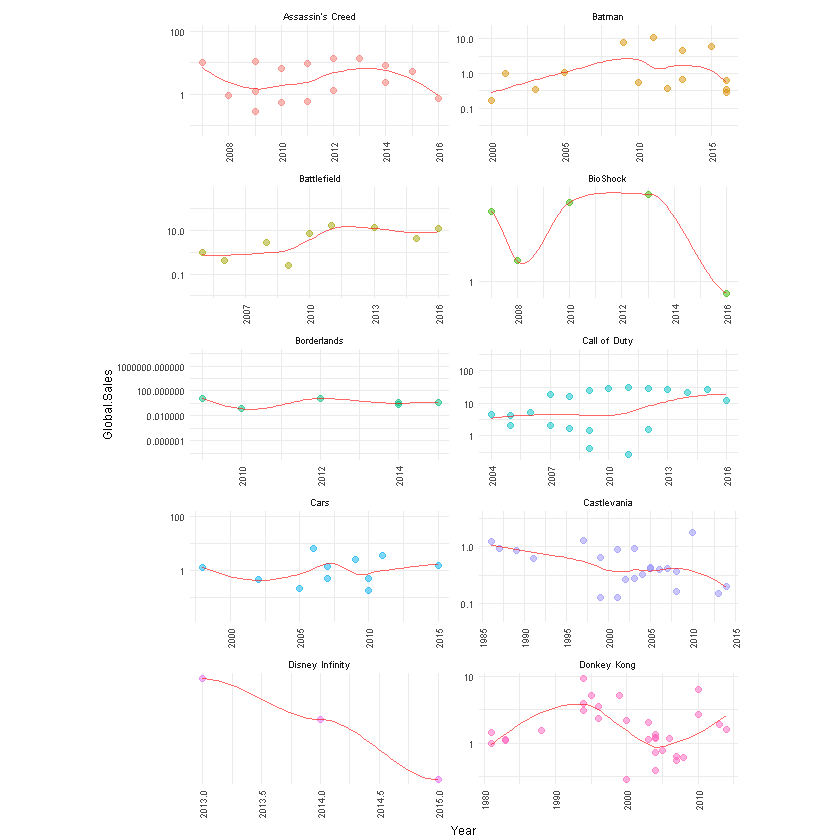

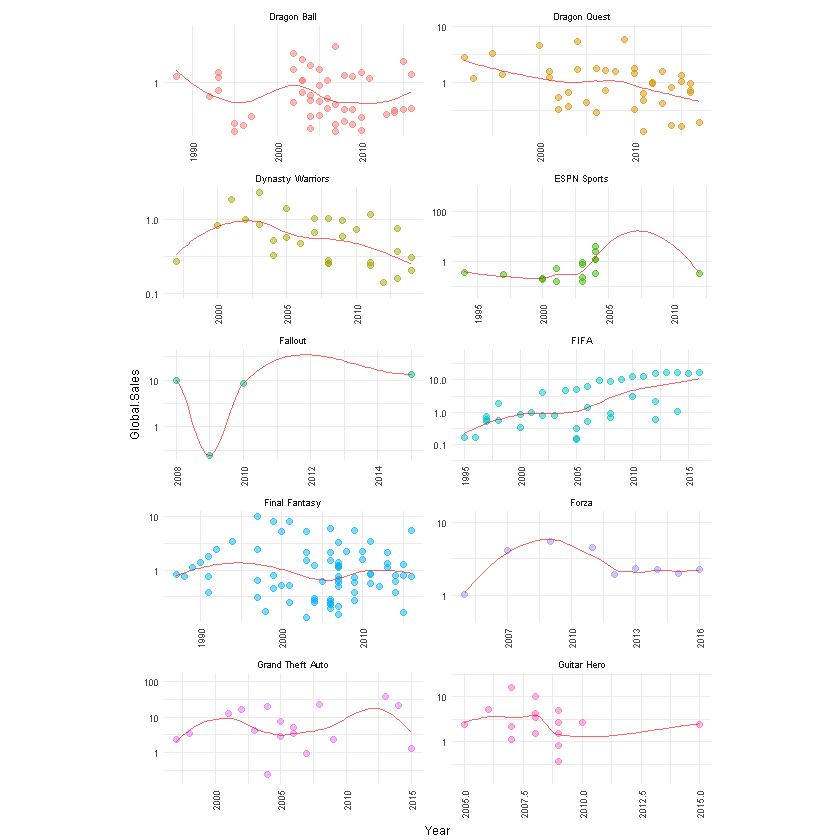

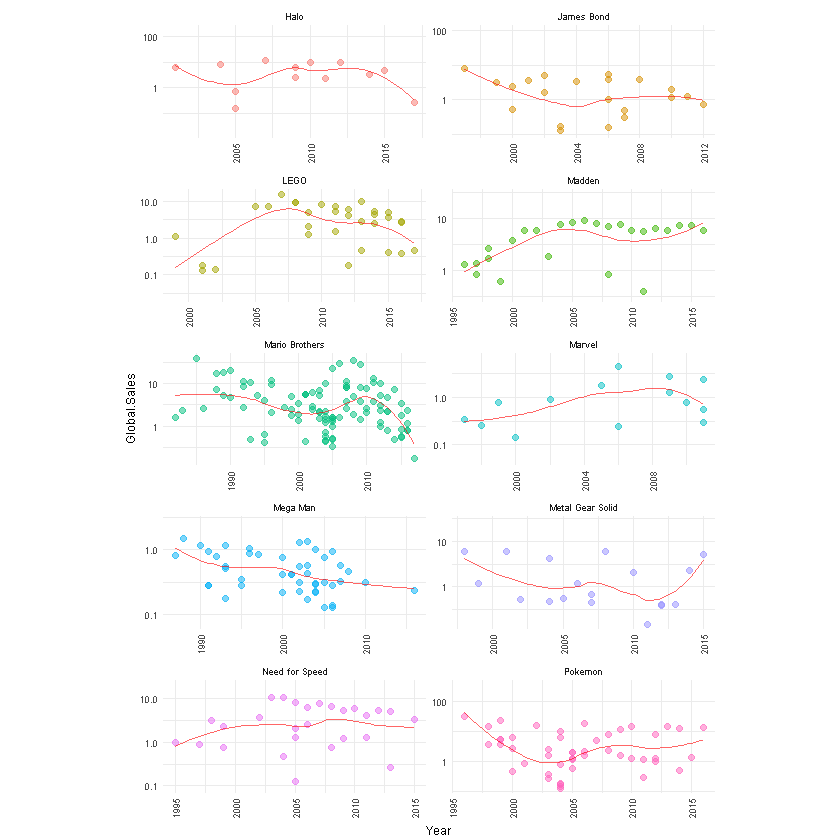

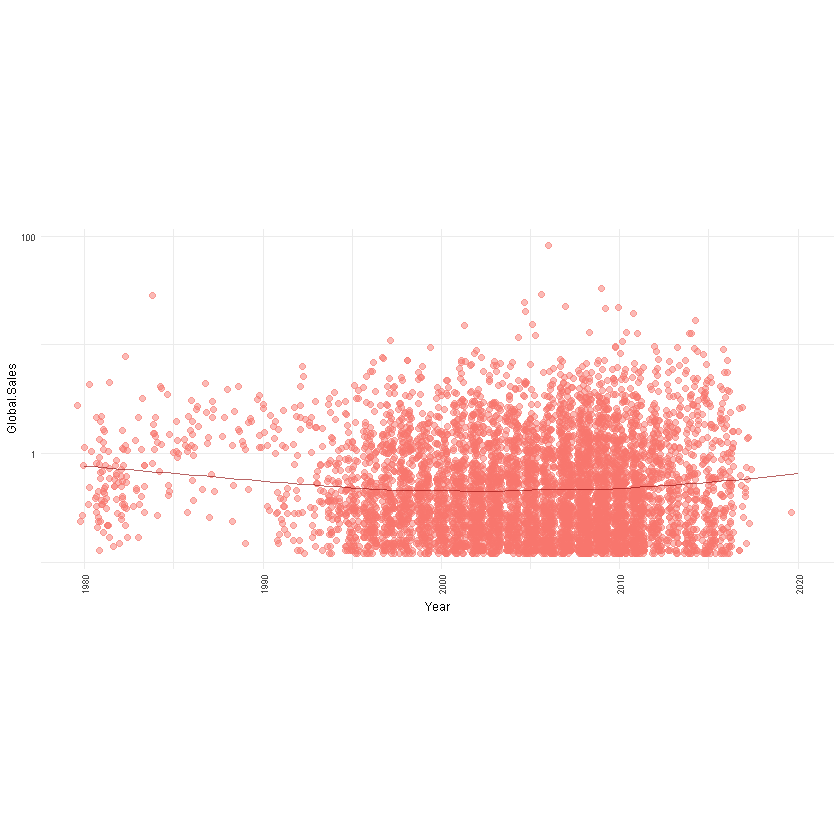

In [41]:
oldw <- getOption("warn")
options(warn = -1)
options(scipen = 1)

Franchise.Sales <- data.frame(vgdata$Franchise, vgdata$Genre, vgdata$Name,
	vgdata$Year, vgdata$Global_Sales)
colnames(Franchise.Sales)[colnames(Franchise.Sales) == 
	'vgdata.Franchise'] <- 'Franchise'
colnames(Franchise.Sales)[colnames(Franchise.Sales) == 
	'vgdata.Genre'] <- 'Genre'
colnames(Franchise.Sales)[colnames(Franchise.Sales) == 
	'vgdata.Name'] <- 'Name'
colnames(Franchise.Sales)[colnames(Franchise.Sales) == 
	'vgdata.Year'] <- 'Year'
colnames(Franchise.Sales)[colnames(Franchise.Sales) == 
	'vgdata.Global_Sales'] <- 'Global.Sales'

Franchise.Sales <- na.omit(Franchise.Sales) %>%
        group_by(Franchise, Name, Year) %>%
        summarise(Global.Sales = sum(Global.Sales)) %>%
        arrange(Franchise, Year, Name)

head(Franchise.Sales)
tail(Franchise.Sales)


ap3 = ggplot(subset(Franchise.Sales, Franchise %in% c('Assassin\'s Creed',
            'Batman', 'Battlefield', 'BioShock', 'Borderlands', 'Call of Duty',
            'Cars', 'Castlevania', 'Disney Infinity', 'Donkey Kong')),
             aes(x = Year,
                 y = Global.Sales,
                 color = Name,
                 fill = Name)) +
      geom_point(stat = 'identity',
                 aes(col = Franchise),
#position = 'jitter',
                 alpha = .5) +
      stat_smooth(aes(y = Global.Sales, group = 1),
                   method = 'loess',
                   fun.y = mean,
                   color = "red",
                   geom = "line",
                   alpha = .6) +
      theme_set(theme_minimal(7)) +
      theme(axis.text.x = element_text(angle = 90,
                                       hjust = 1,
                                       vjust = .5),
            aspect.ratio = 3 / 7,
            legend.position = 'none') +
      scale_y_log10() +
      facet_wrap(~factor(Franchise),
                 scales = 'free',
                 nrow = 4)


ap3


ap4 = ggplot(subset(Franchise.Sales, Franchise %in% c('Dragon Ball',
            'Dragon Quest', 'Dynasty Warriors', 'ESPN Sports',
            'Fallout', 'FIFA', 'Final Fantasy', 'Forza', 'Grand Theft Auto',
            'Guitar Hero')),
             aes(x = Year,
                 y = Global.Sales,
                 color = Name,
                 fill = Name)) +
      geom_point(stat = 'identity',
                 aes(col = Franchise),
#position = 'jitter',
                 alpha = .5) +
      stat_smooth(aes(y = Global.Sales, group = 1),
                   method = 'loess',
                   fun.y = mean,
                   color = "red",
                   geom = "line",
                   alpha = .6) +
      theme_set(theme_minimal(7)) +
      theme(axis.text.x = element_text(angle = 90,
                                       hjust = 1,
                                       vjust = .5),
            aspect.ratio = 3 / 7,
            legend.position = 'none') +
      scale_y_log10() +
      facet_wrap(~factor(Franchise),
                 scales = 'free',
                 nrow = 4)


ap4


ap5 = ggplot(subset(Franchise.Sales, Franchise %in% c('Halo',
             'James Bond', 'LEGO', 'Madden', 'Mario Brothers',
             'Marvel', 'Mega Man', 'Metal Gear Solid',
             'Need for Speed', 'Pokemon')),
             aes(x = Year,
                 y = Global.Sales,
                 color = Name,
                 fill = Name)) +
      geom_point(stat = 'identity',
                 aes(col = Franchise),
#position = 'jitter',
                 alpha = .5) +
      stat_smooth(aes(y = Global.Sales, group = 1),
                   method = 'loess',
                   fun.y = mean,
                   color = "red",
                   geom = "line",
                   alpha = .6) +
      theme_set(theme_minimal(7)) +
      theme(axis.text.x = element_text(angle = 90,
                                       hjust = 1,
                                       vjust = .5),
            aspect.ratio = 3 / 7,
            legend.position = 'none') +
      scale_y_log10() +
      facet_wrap(~factor(Franchise),
                 scales = 'free',
                 nrow = 4)


ap5

ap6 = ggplot(subset(Franchise.Sales, Franchise %in% c('Prince of Persia',
            'Resident Evil', 'Rock Band ', 'Skylanders', 'Sonic',
            'Star Wars', 'Tales of', 'Tetris', 'The Sims', 'Zelda')),
             aes(x = Year,
                 y = Global.Sales,
                 color = Name,
                 fill = Name)) +
      geom_point(stat = 'identity',
                 aes(col = Franchise),
#position = 'jitter',
                 alpha = .5) +
      stat_smooth(aes(y = Global.Sales, group = 1),
                   method = 'loess',
                   fun.y = mean,
                   color = "red",
                   geom = "line",
                   alpha = .6) +
      theme_set(theme_minimal(7)) +
      theme(axis.text.x = element_text(angle = 90,
                                       hjust = 1,
                                       vjust = .5),
            aspect.ratio = 3 / 7,
            legend.position = 'none') +
      scale_y_log10() +
      facet_wrap(~factor(Franchise),
                 scales = 'free',
                 nrow = 4)
ap6


ap7 = ggplot(subset(Franchise.Sales, Franchise == 'Other'),
             aes(x = Year,
                 y = Global.Sales,
                 color = '#a65481',
                 fill = '#a65481')) +
      geom_point(stat = 'identity',
                 aes(col = '#a65481'),
                 position = 'jitter',
                 alpha = .5) +
      stat_smooth(aes(y = Global.Sales, group = 1),
                   method = 'loess',
                   fun.y = mean,
                   color = "darkred",
                   geom = "line",
                   alpha = .6) +
      theme_set(theme_minimal(7)) +
      theme(axis.text.x = element_text(angle = 90,
                                       hjust = 1,
                                       vjust = .5),
            aspect.ratio = 3 / 7,
            legend.position = 'none') +
      scale_y_log10()


ap7


I wanted to take a look at all the games over time on a scatter plot, but when put all together on one plot it was really difficult to make any sense of since there weren't any defined patterns of note. Faceting by Franchise made these graphs really interesting (if not small), and you can see which Franchises have been the most prolific at which points in time. To better visualize how the franchise does as a whole, I added a mean line for average units shipped per year. This line helps visualize the general way game sales are trending for each franchise.

There is a lot of information here, and this is one of the plots I found myself having the most fun looking at, since it was really cool to see how different franchises have been doing as they release more games

# Multivariate Analysis

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Once the games were broken out on a scatterplot of units shipped by Name and Franchise over year, it was easier to see patterns in the performance of different franchises. Notably, FIFA games continue to rise in number shipped, usually shipping well over 10 million units. There is a similar pattern in Madden, so it begins to become clear why EA is so gung-ho to keep churning out a new game for each league every year.  Call of Duty is another franchise that is almost assured to sell over 10 million units if they put out a new game.

Most other franchises have released to various levels of success, and others like Skylanders and Disney Infinity might have been fads since their sales have steadily been decreasing.


### Were there any interesting or surprising interactions between features?

Looking at the global sales broken out by region, I was extremely surprised to see the giant drop off in game sales after 2009, since it hasn't recovered, however drilling into that further revealed that maybe it isn't so much a video game bubble that popped, but a few years where many publishers struck gold that caused a big increase in sales worldwide. As new AAA titles are released in the future (especially in the wildly popular franchises), I expect future years may also experience a boom in sales thanks to a few blockbuster hits.


# Final Plots and Summary

## Plot One

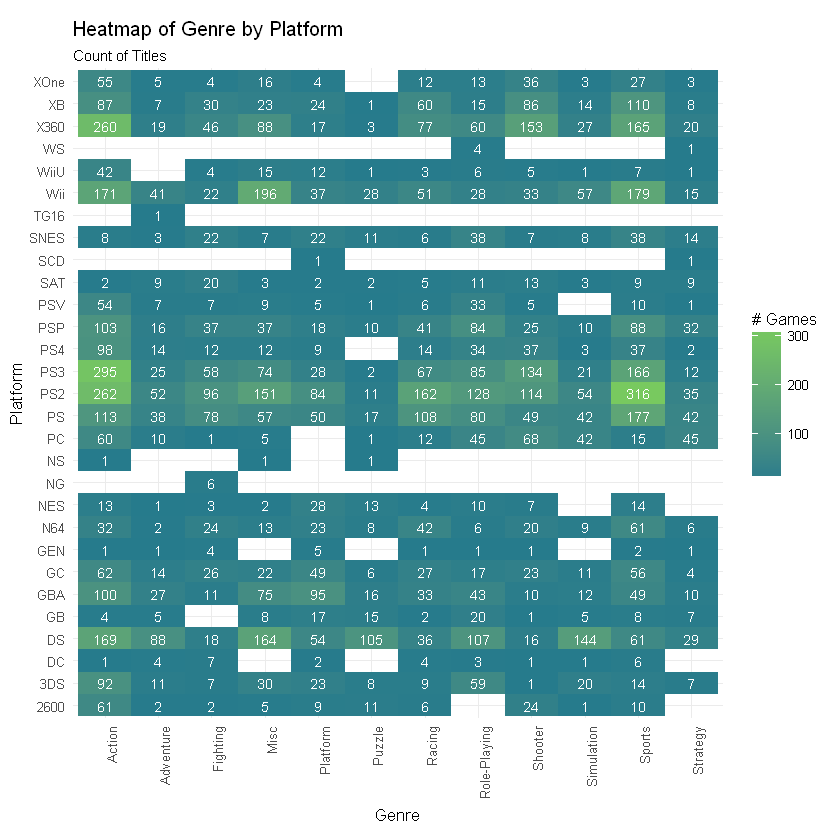

In [295]:
bin3 <- ggplot(vgdata, aes(vgdata$Genre, vgdata$Platform)) +
        theme(axis.text.x = element_text(angle = 90, hjust = 1),
           aspect.ratio = 1) +
        geom_bin2d() +
        stat_bin2d(geom = 'text', aes(label = ..count..), col = 'white', size = 3) +
        scale_fill_gradient("# Games", high = "#78c95f", low = "#267b8c", guide = 'colorbar') +
        labs(title = 'Heatmap of Genre by Platform',
                     subtitle = 'Count of Titles',
                     x = 'Genre',
                     y = 'Platform')

bin3


### Description

Heatmap plot made with bin2d that shows the count of games published in each genre on each platform. Blue squares are lower numbers published, while green squares are higher numbers of games. This provides an quick visualization that shows the popularity of PlayStation 2 and PlayStation 3 consoles across many genres. Additionally, this depicts the general popularity of Sports and Action games across platforms.


## Plot Two

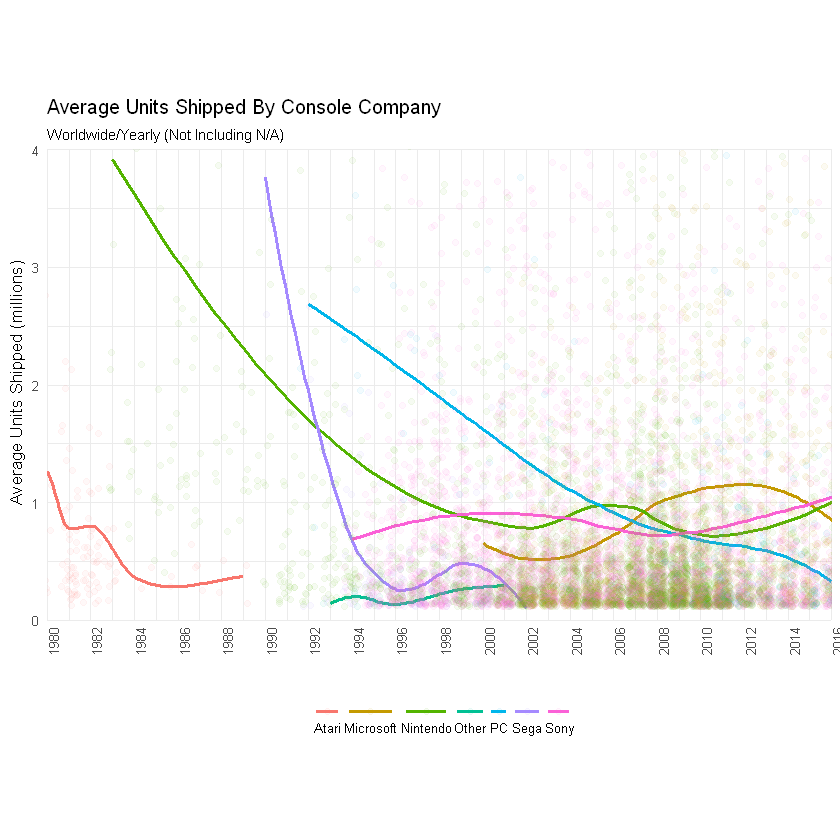

In [111]:
s6 = ggplot(vgdata, 
             aes(x = Year, 
                 y = Global_Sales,
                 color = Console_Company)) +
      geom_smooth(stat = 'smooth', 
                  method = 'loess',
                  se = F,
                  aes(col = Console_Company)) + 
      geom_point(aes(col = Console_Company),
                 alpha = .05,
                 position = 'jitter') +
      theme(axis.text.x = element_text(angle = 90, hjust = 1),
            aspect.ratio = 3/5,
            legend.position = 'bottom') +
      coord_trans(limy = c(0, 4), limx = c(1980, 2016)) +
      labs(title = 'Average Units Shipped By Console Company',
           subtitle = 'Worldwide/Yearly (Not Including N/A)',
           x = '',
           y = ' Average Units Shipped (millions)',
           fill = NULL) +
      guides(color = guide_legend(nrow = 1, 
                                  label.position = 'bottom',
                                  keywidth = .5, 
                                  keyheight = .5,
                                  title = '')) +
      scale_x_continuous(breaks = seq(1980, 2016, by = 2))
                                        
s6

### Description

This smooth line plot shows the trend of global units shipped for games published by each console company. The method for smoothing used is 'loess', with standard error set to false. Games are plotted on a scatter plot to show where the data points are. Coordinates are transformed to show the averages of the entire data set, so not all points representing games are shown.

The plot is cut off at 2016, as to not show partial years as part of the trend. This shows an overall rise in average units shipped for Sony and Nintendo, while Microsoft and PCs have continued to have lowered average units shipped.


## Plot Three

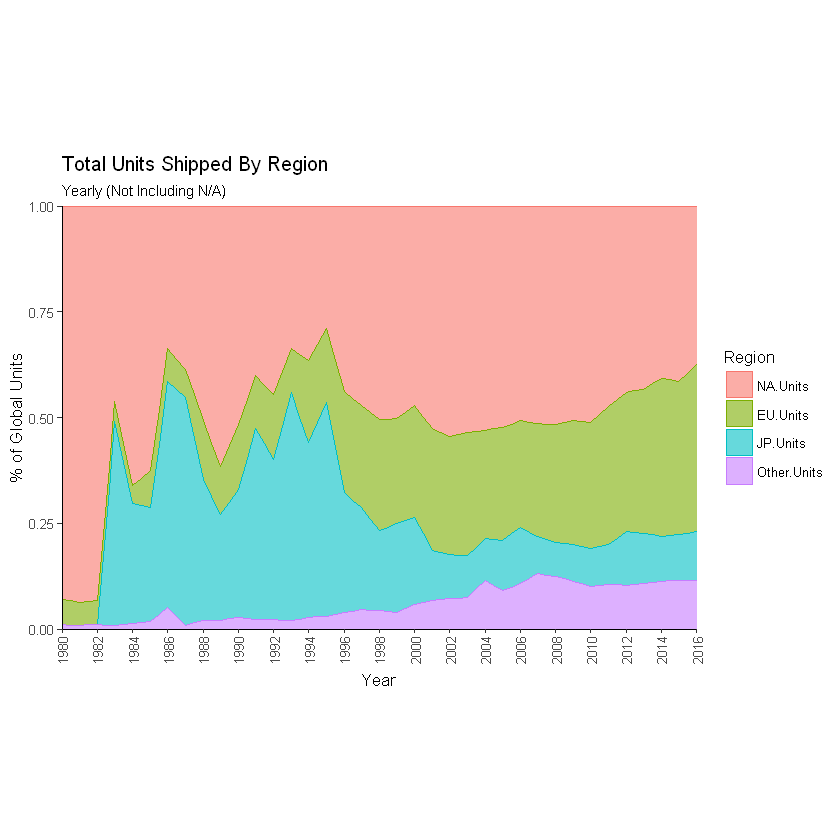

In [198]:
oldw <- getOption("warn")
options(warn = -1)

ap3 = ggplot(subset(total.sales, Region != 'Global.Units'),
             aes(x = Year,
                 y = Total,
                 col = Region,
                 fill = Region,
                 group = Region)) +
      geom_density(stat = 'identity',
                   alpha = .6,
                   position = 'fill') +
      theme(axis.text.x = element_text(angle = 90, 
                                       hjust = 1,
                                       vjust = .5),
           aspect.ratio = 2/3) +
      labs(title = 'Total Units Shipped By Region',
           subtitle = 'Yearly (Not Including N/A)',
           x = 'Year',
           y = '% of Global Units') +
      coord_trans(limx = c(1980, 2016), limy = c(0, 1)) +
      scale_x_continuous(breaks = seq(1980, 2016, by = 2))
      
ap3

options(warn = oldw)

### Description

The Global units shipped numbers broken out by regions, in my opinion is one of the most interesting plots because of the scope of the story it tells. This plot was cleaned up to cut off at 2016, since it doesn't make sense to measure any years that are not complete in these numbers. This is a pattern that seems to have begun for North America as well, as the EU picks up steam in the gaming market and increases their overall share of the pie. On average, NA and EU regions make up about 75% of global units shipped, with EU gaining on NA as the years go on.


# Reflection

It has been really interesting starting with what I thought was a pretty shallow dataset as far as the amount of information about each game that it started with. All this said, once new columns were generated, and the data was reshaped, questions and exploration really began to flow freely. I've found myself most drawn to the Name/Franchise data, since drilling into that that was answering many of the questions that I'd come up with as I went through this exercise.

This set began with the 10k rows of top selling games, and then used extensive reshaping in order to explore the data in different ways, and be able to make different types of charts. While I conducted the exploration, I logged my thoughts and observations, along with relevant summaries along the way.

There was a clear boom in video game sales over a period of few years that could be observed after gaming really hit mainstream and became wildly popular. Most game sales are at this point trending downwards, though the dataset explored here isn't the best for being able to make conclusions about why that might be,

I've found it's tough to find a good stopping point, since every time I add a graph, it seems to open up a new wormhole of "what if I look at it this way instead" questions. I feel as though I've really just begun to scratch the surface of the exploration that could be done here, especially if I were to have created a linear model to try and predict how franchises will sell.

One of my biggest frustrations with organizing this dataset was figuring out franchises, as the last thing I wanted to do was
insert dirty data into a tidy dataset. To do this part of the cleanup to the best of my abilities, I'd sorted the dataset by title, as well as global sum in order to best gauge which franchises were popular, or frequently occurring. From there, I selected the obvious ones to include, but left out may worthy franchises, opting for a large ```Other``` bucket. This made it so faceting the data on franchise would be feasible, and was nice for representing the most obvious franchises. However, it left the ```Other``` bucket large, which ended up catching some of the biggest waves makers in the industry, such as *Tetris*, until data was closely investgated in data frames. In a perfect world, if a game is part of a franchise, it would be named in the franchise column, but really what this ended up being was 'top franchises'.

As far as top consoles go, it's pretty decisive that it's either Nintendo or Sony at any given point in time. This is a disappointment for me, since I spent the early part of my career at Xbox, and my gaming platform of choice is a PC. It's okay for me to have a preference towards those platforms, but it would be very hard for me to argue that Microsoft was in any way winning the console wars with either Xbox or PCs (which aren't all Microsoft based anyways).